## Exploratory Data Analysis

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px

import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline

In [3]:
#loading the dataset
data = pd.read_csv(r"D:\Downloads\merged_data.csv")

In [4]:
#understanding the data
data.shape


(108945, 8)

In [5]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2019-02-08,48.599998,48.930000,48.470001,48.910000,46.454433,906700,NVO
1,2019-02-11,48.680000,48.810001,48.419998,48.660000,46.216980,1001200,NVO
2,2019-02-12,48.990002,49.480000,48.830002,49.400002,46.919834,868600,NVO


In [6]:
data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
108942,2022-02-04,13.62,14.92,13.53,14.72,14.72,50700,ANVS
108943,2022-02-07,14.59,16.16,14.47,14.96,14.96,74000,ANVS
108944,2022-02-08,14.80,15.20,14.01,14.70,14.70,36000,ANVS


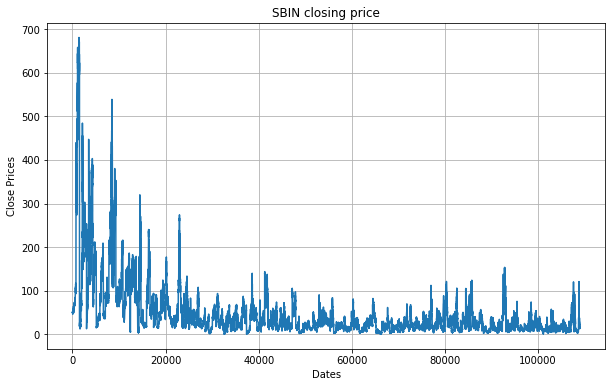

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('SBIN closing price')
plt.show()

In [8]:
#converting date type object to datetime64
data['Date'] = data['Date'].astype('datetime64[ns]')

In [9]:
def visualize_data():
  data = pd.read_csv(r"D:\Downloads\merged_data.csv")

In [10]:
 data_corr = data.corr()
print(data_corr.head())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999671  0.999668  0.999424   0.999417  0.063068
High       0.999671  1.000000  0.999477  0.999702   0.999701  0.067274
Low        0.999668  0.999477  1.000000  0.999700   0.999688  0.059239
Close      0.999424  0.999702  0.999700  1.000000   0.999993  0.063466
Adj Close  0.999417  0.999701  0.999688  0.999993   1.000000  0.063520


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       108945 non-null  datetime64[ns]
 1   Open       108945 non-null  float64       
 2   High       108945 non-null  float64       
 3   Low        108945 non-null  float64       
 4   Close      108945 non-null  float64       
 5   Adj Close  108945 non-null  float64       
 6   Volume     108945 non-null  int64         
 7   Symbol     108945 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.6+ MB


In [12]:
#checking the missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [13]:
#checking the missing value percentage
data.isnull().sum() / data.shape[0] * 100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Symbol       0.0
dtype: float64

In [14]:
#converting date type into datetime 
data['Date'] = data['Date'].astype('datetime64[ns]')

In [15]:
#correcting date format
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,08-02-2019,48.599998,48.930000,48.470001,48.910000,46.454433,906700,NVO
1,11-02-2019,48.680000,48.810001,48.419998,48.660000,46.216980,1001200,NVO
2,12-02-2019,48.990002,49.480000,48.830002,49.400002,46.919834,868600,NVO
3,13-02-2019,49.040001,49.279999,49.020000,49.090000,46.625393,868900,NVO
4,14-02-2019,49.750000,49.910000,49.560001,49.779999,47.280754,2015900,NVO


In [16]:
#descriptive analysis
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,108945.000000,108945.000000,108945.000000,108945.000000,108945.000000,1.089450e+05
mean,45.370765,46.472301,44.222670,45.332287,45.300636,7.786527e+05
std,65.105505,66.168111,63.985977,65.104704,65.074106,2.516812e+06
min,0.752000,0.850000,0.700000,0.750000,0.750000,0.000000e+00
25%,14.380000,14.850000,13.880000,14.330000,14.300000,1.378000e+05
50%,24.719999,25.540001,23.920000,24.690001,24.690001,3.438000e+05
75%,46.700001,48.040001,45.290001,46.660000,46.589153,7.761000e+05
max,683.500000,686.619995,674.570007,680.960022,680.960022,2.246410e+08


In [17]:
#checking unique datas in columns
print(data['Symbol'].unique())

['NVO' 'REGN' 'MRNA' 'VRTX' 'BNTX' 'BGNE' 'SGEN' 'GMAB' 'ALNY' 'RPRX'
 'BMRN' 'TECH' 'ARGX' 'INCY' 'UTHR' 'BHVN' 'JAZZ' 'DNA' 'ASND' 'SRPT'
 'NVAX' 'LEGN' 'EXEL' 'MRTX' 'ARNA' 'ARWR' 'HALO' 'BPMC' 'RARE' 'IONS'
 'HCM' 'APLS' 'GLPG' 'DNLI' 'BEAM' 'CERT' 'VIR' 'ACAD' 'ARVN' 'ABCM'
 'ALKS' 'MRVI' 'CYTK' 'BCRX' 'PTCT' 'SWTX' 'INSM' 'ABCL' 'EXAI' 'IBRX'
 'ADPT' 'RCUS' 'CCXI' 'NKTR' 'RXRX' 'GBT' 'VALN' 'ISEE' 'TPTX' 'AGIO'
 'PRTA' 'LYEL' 'RXDX' 'RVMD' 'MDGL' 'TIL' 'ALLO' 'FGEN' 'VERV' 'ERAS'
 'BCYC' 'SANA' 'BBIO' 'ALEC' 'ATRA' 'ENTA' 'CDXS' 'IMGN' 'MYOV' 'NGM'
 'INVA' 'ADCT' 'NUVB' 'EDIT' 'CCCC' 'AMLX' 'IMCR' 'RGNX' 'MOR' 'PCVX'
 'SEER' 'AVXL' 'CNTA' 'CRNX' 'DAWN' 'KURA' 'SGMO' 'REPL' 'ANAB' 'MOLN'
 'NUVL' 'DSGN' 'KZR' 'SNDX' 'ABSI' 'ARQT' 'ZEAL' 'QURE' 'BLU' 'ACRS'
 'IMGO' 'KNSA' 'PMVP' 'CRBU' 'MCRB' 'KDNY' 'MGNX' 'KPTI' 'IPSC' 'ICVX'
 'STOK' 'SRRK' 'GOSS' 'AKRO' 'MGTX' 'IMVT' 'GLUE' 'RPTX' 'EWTX' 'OMGA'
 'CGEM' 'ALXO' 'VTYX' 'IDYA' 'TNYA' 'PRAX' 'PHAT' 'PHVS' 'HUMA' 'AVIR'
 'IGMS' 'CALT' '

In [18]:
#check Symbol data
data.Symbol.value_counts()

NVO     757
RGNX    757
QURE    757
ZEAL    757
SNDX    757
       ... 
VTYX     76
XLO      75
IOBT     65
AMLX     22
VIGL     22
Name: Symbol, Length: 205, dtype: int64

# Zero values can affect our dataset, so converting zero to NULL and after that filling it with mean values

In [19]:
data["Open"]=data["Open"].replace(0,np.nan)
data["High"]=data["High"].replace(0,np.nan)
data["Low"]=data["Low"].replace(0,np.nan)
data["Close"]=data["Close"].replace(0,np.nan)
data["Adj Close"]=data["Adj Close"].replace(0,np.nan)
data["Volume"]=data["Volume"].replace(0,np.nan)

In [20]:
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       91
Symbol        0
dtype: int64

# Volume column filled with mean

In [21]:
data['Volume'] = data['Volume'].fillna(data.groupby('Symbol')['Volume'].transform('mean'))
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,08-02-2019,48.599998,48.930000,48.470001,48.91,46.454433,906700.0,NVO
1,11-02-2019,48.680000,48.810001,48.419998,48.66,46.216980,1001200.0,NVO


In [22]:
data.set_index("Date", inplace=True)
data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
08-02-2019,48.599998,48.930000,48.470001,48.910000,46.454433,906700.0,NVO
11-02-2019,48.680000,48.810001,48.419998,48.660000,46.216980,1001200.0,NVO
12-02-2019,48.990002,49.480000,48.830002,49.400002,46.919834,868600.0,NVO


In [23]:
data.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
07-02-2022,14.59,16.16,14.47,14.96,14.96,74000.0,ANVS
08-02-2022,14.80,15.20,14.01,14.70,14.70,36000.0,ANVS


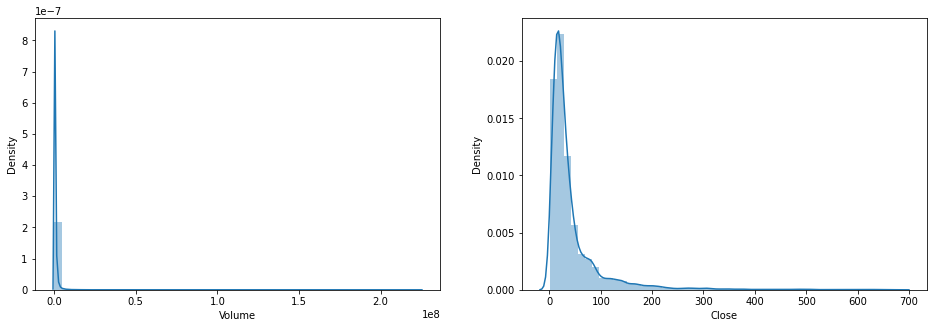

In [25]:
#distribution 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Volume'])
plt.subplot(1,2,2)
sns.distplot(data['Close'])
plt.show()



# Box plot for outlier detection

<AxesSubplot:xlabel='Volume'>

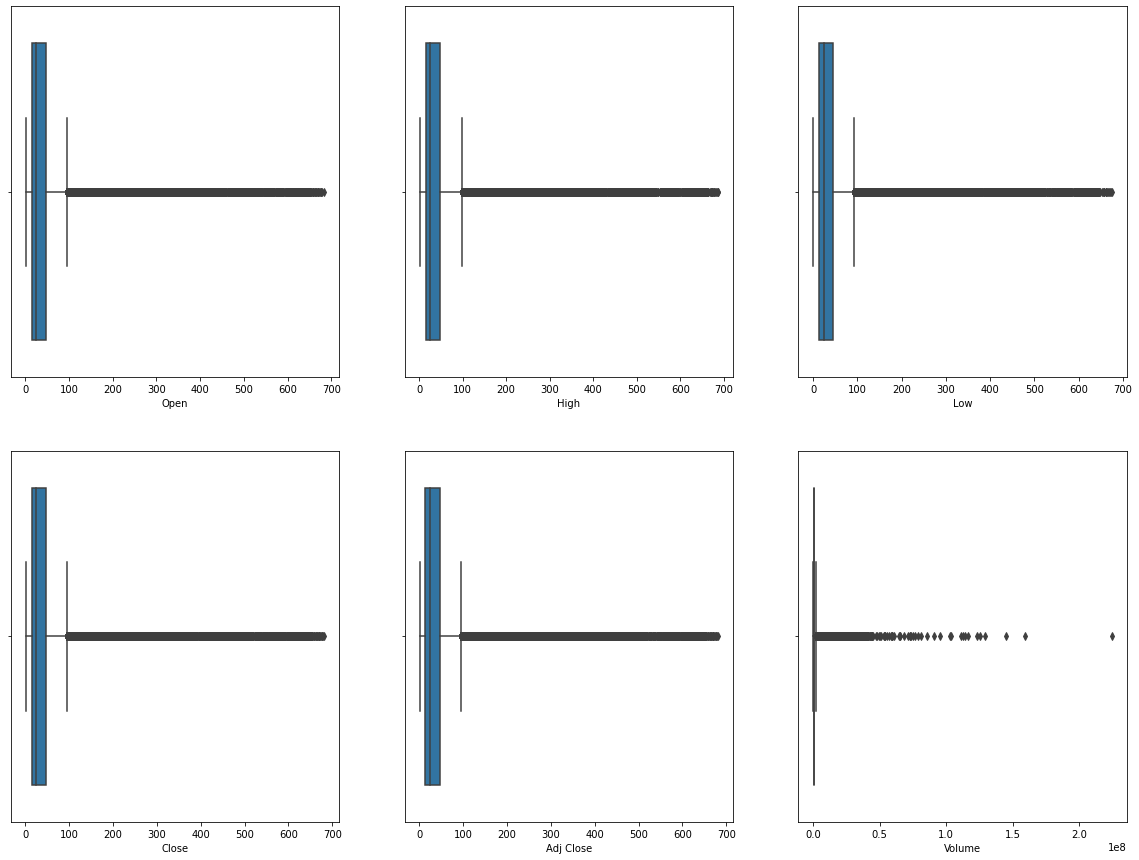

In [26]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(data["Open"])

plt.subplot(2,3,2)
sns.boxplot(data["High"])

plt.subplot(2,3,3)
sns.boxplot(data["Low"])

plt.subplot(2,3,4)
sns.boxplot(data["Close"])

plt.subplot(2,3,5)
sns.boxplot(data["Adj Close"])

plt.subplot(2,3,6)
sns.boxplot(data["Volume"])

# interquartile

In [27]:
#using interquartile to filter outlier
Q1=data.quantile(0.25)
Q1

Open             14.38
High             14.85
Low              13.88
Close            14.33
Adj Close        14.30
Volume       137900.00
Name: 0.25, dtype: float64

In [28]:
Q3=data.quantile(0.75)
Q3

Open             46.700001
High             48.040001
Low              45.290001
Close            46.660000
Adj Close        46.589153
Volume       776100.000000
Name: 0.75, dtype: float64

In [29]:
IQR=Q3-Q1
IQR

Open             32.320001
High             33.190001
Low              31.410001
Close            32.330000
Adj Close        32.289153
Volume       638200.000000
dtype: float64

In [30]:
Lower_Limit=Q1-1.5*IQR
Lower_Limit

Open            -34.100001
High            -34.935000
Low             -33.235001
Close           -34.165000
Adj Close       -34.133729
Volume      -819400.000000
dtype: float64

In [31]:
Higher_Limit=Q3+1.5*IQR
Higher_Limit

Open         9.518000e+01
High         9.782500e+01
Low          9.240500e+01
Close        9.515500e+01
Adj Close    9.502288e+01
Volume       1.733400e+06
dtype: float64

In [32]:
new_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
08-02-2019,48.599998,48.930000,48.470001,48.910000,46.454433,906700.0,NVO
11-02-2019,48.680000,48.810001,48.419998,48.660000,46.216980,1001200.0,NVO
12-02-2019,48.990002,49.480000,48.830002,49.400002,46.919834,868600.0,NVO


In [33]:
new_data.shape

(89929, 7)

In [34]:
new_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,89929.000000,89929.000000,89929.000000,89929.000000,89929.000000,8.992900e+04
mean,28.061817,28.844257,27.238680,28.017234,27.994512,4.249055e+05
std,20.181171,20.619687,19.721732,20.167789,20.162960,3.959282e+05
min,0.752000,0.850000,0.700000,0.750000,0.750000,1.000000e+02
25%,13.580000,13.990000,13.110000,13.520000,13.500000,1.188000e+05
50%,22.400000,23.059999,21.660000,22.330000,22.320000,2.917000e+05
75%,36.730000,37.820000,35.650002,36.680000,36.680000,6.227000e+05
max,95.110001,97.800003,92.394997,95.000000,95.000000,1.733300e+06


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89929 entries, 08-02-2019 to 08-02-2022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       89929 non-null  float64
 1   High       89929 non-null  float64
 2   Low        89929 non-null  float64
 3   Close      89929 non-null  float64
 4   Adj Close  89929 non-null  float64
 5   Volume     89929 non-null  float64
 6   Symbol     89929 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.5+ MB


# Outlier removed data   

In [36]:
new_data["Open"]=new_data["Open"].clip(lower=new_data["Open"].quantile(0.06), upper=new_data["Open"].quantile(0.94))
new_data["High"]=new_data["High"].clip(lower=new_data["High"].quantile(0.06), upper=new_data["High"].quantile(0.94))
new_data["Low"]=new_data["Low"].clip(lower=new_data["Low"].quantile(0.06), upper=new_data["Low"].quantile(0.94))
new_data["Close"]=new_data["Close"].clip(lower=new_data["Close"].quantile(0.06), upper=new_data["Close"].quantile(0.94))
new_data["Adj Close"]=new_data["Adj Close"].clip(lower=new_data["Adj Close"].quantile(0.06), upper=new_data["Adj Close"].quantile(0.94))
new_data["Volume"]=new_data["Volume"].clip(lower=new_data["Volume"].quantile(0.04), upper=new_data["Volume"].quantile(0.96))

# visualization after removing outliers

<AxesSubplot:xlabel='Volume'>

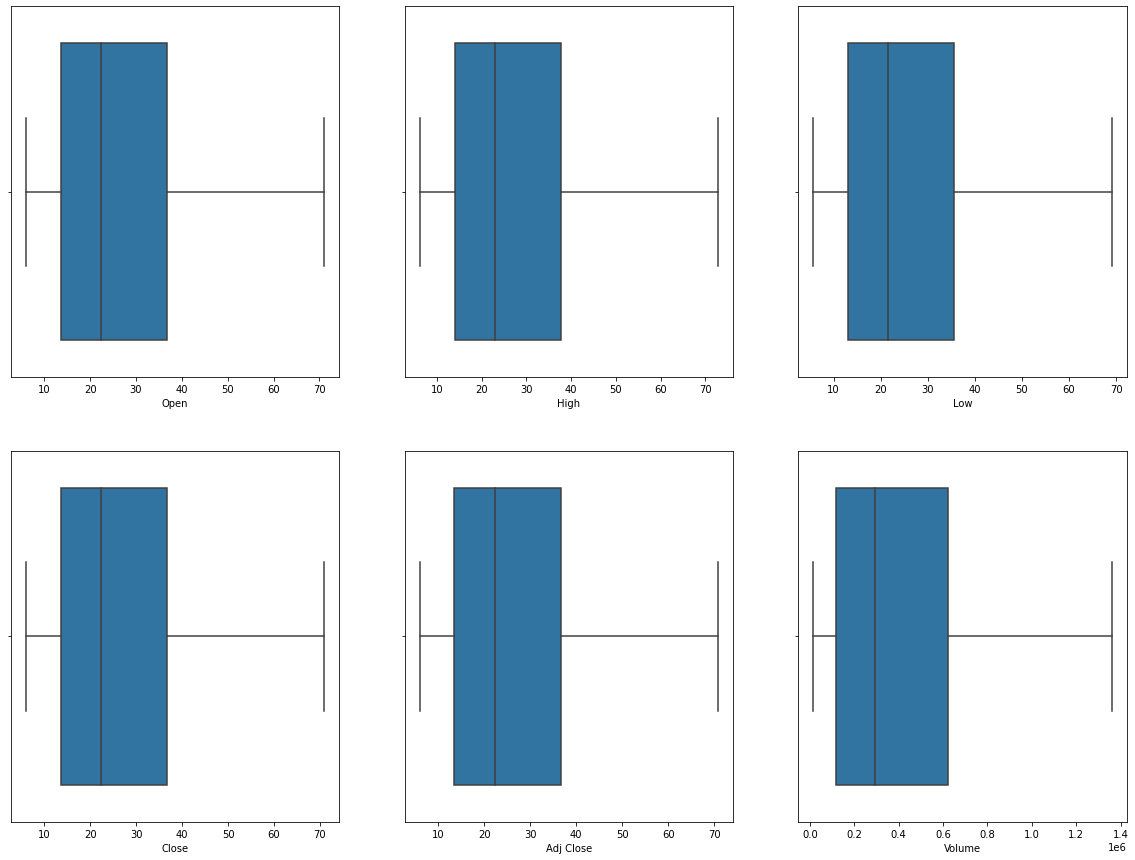

In [46]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(new_data["Open"])

plt.subplot(2,3,2)
sns.boxplot(new_data["High"])

plt.subplot(2,3,3)
sns.boxplot(new_data["Low"])

plt.subplot(2,3,4)
sns.boxplot(new_data["Close"])

plt.subplot(2,3,5)
sns.boxplot(new_data["Adj Close"])

plt.subplot(2,3,6)
sns.boxplot(new_data["Volume"])


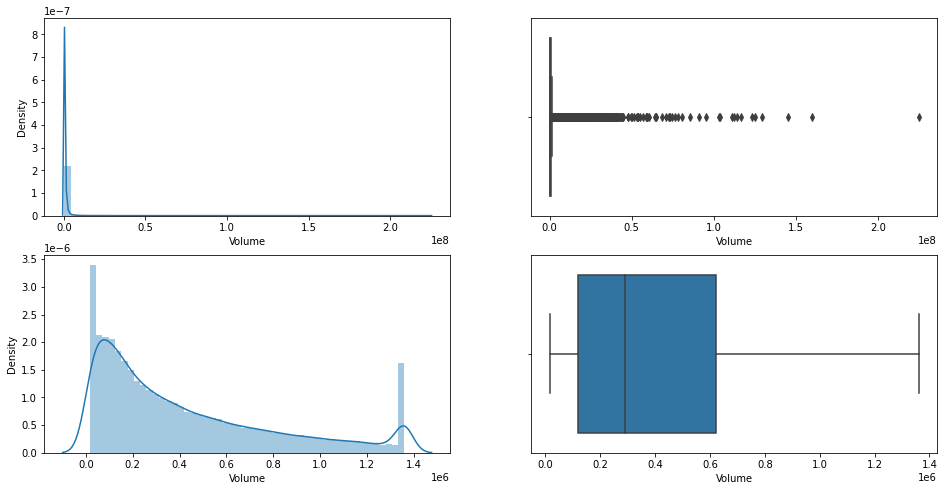

In [47]:
#comparing plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Volume'])
plt.subplot(2,2,2)
sns.boxplot(data['Volume'])
plt.subplot(2,2,3)
sns.distplot(new_data['Volume'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Volume'])
plt.show()

# Data visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

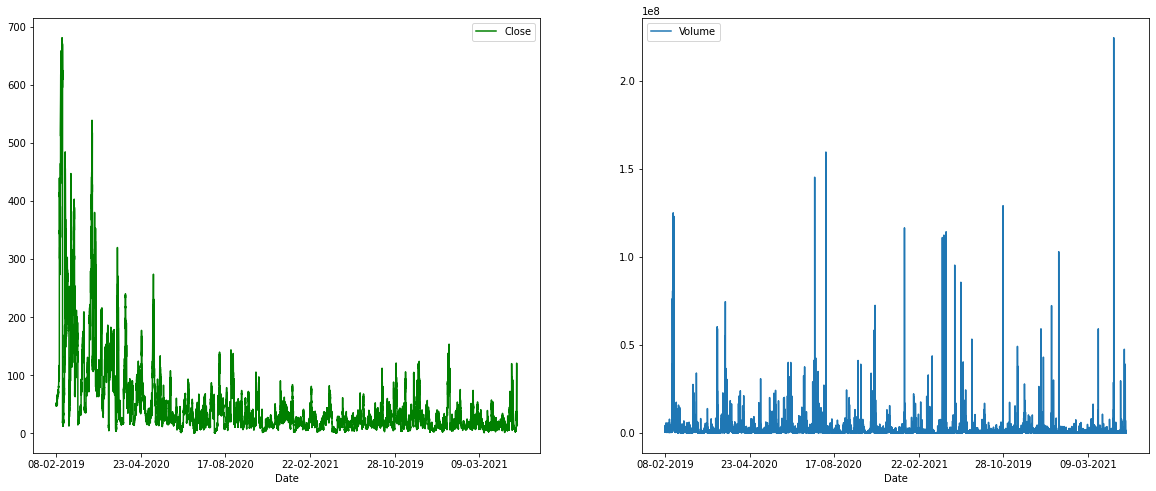

In [48]:
# Let's see a historical view of the closing price
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8)) 
data['Close'].plot(legend=True,color="g", ax=ax1)
plt.show

data['Volume'].plot(legend=True,ax =ax2)
plt.show

This comparison is meant to answer my first question: when is stock market most heavily traded? The answer is simply when the price goes up more people trade.when the price goes down many people have sold. Therefore, day traders should be aware that a rapid increase in price means a rapid increase in risk.

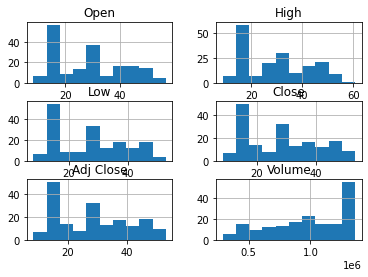

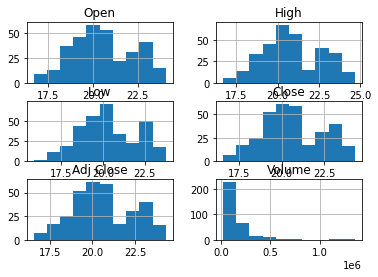

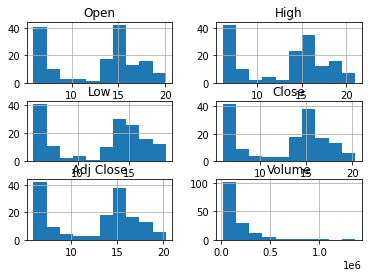

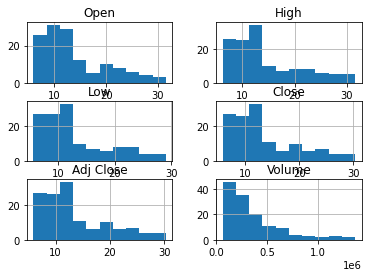

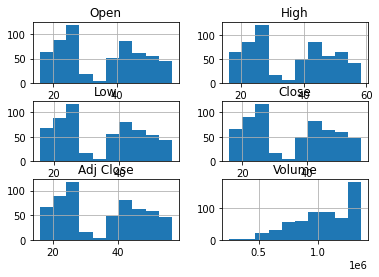

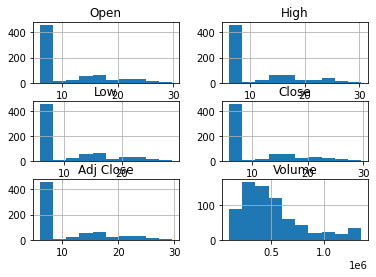

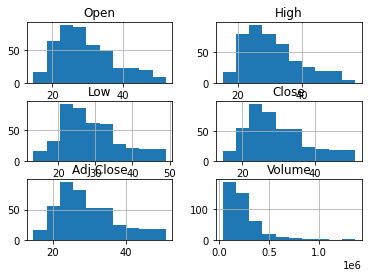

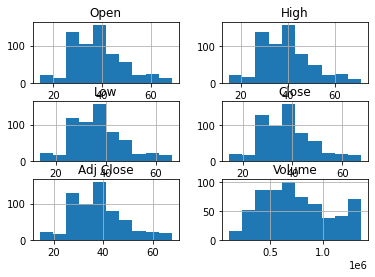

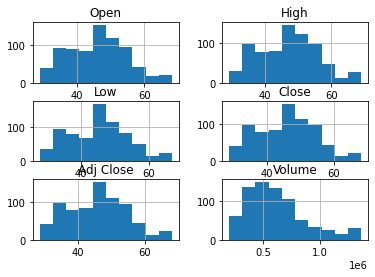

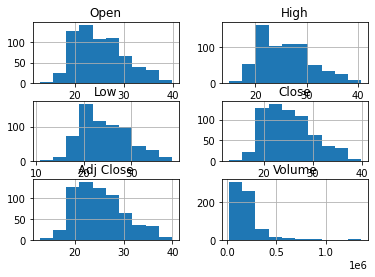

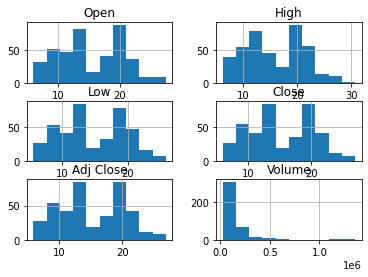

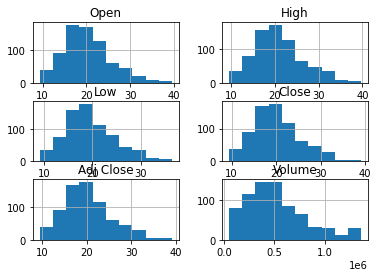

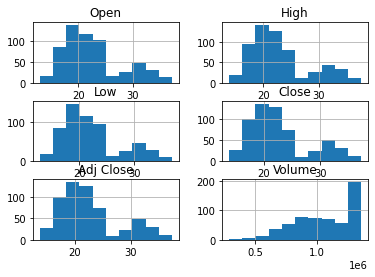

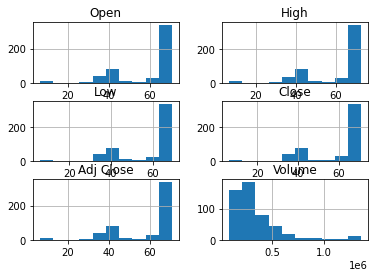

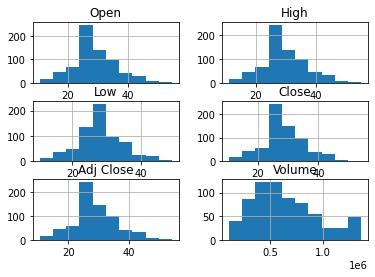

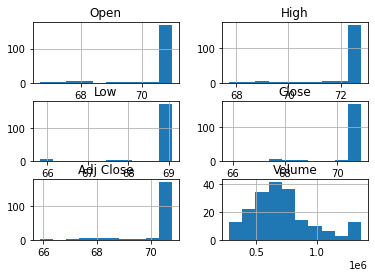

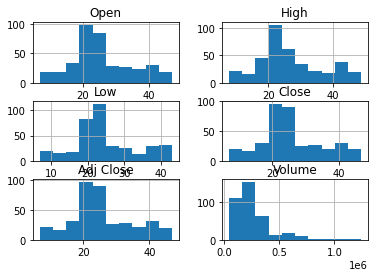

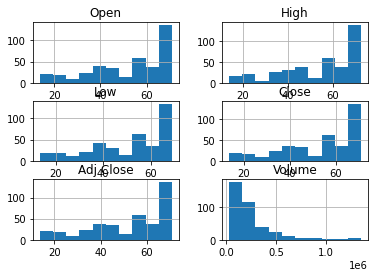

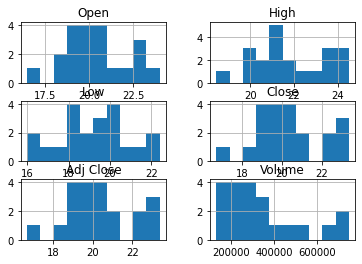

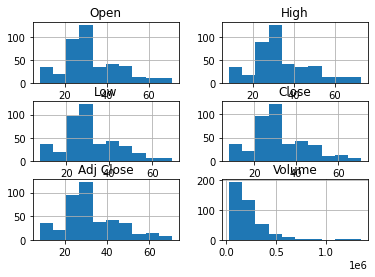

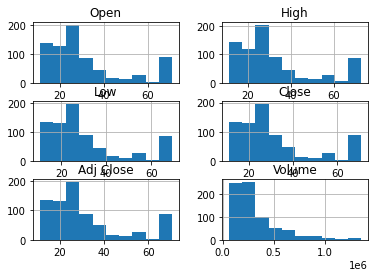

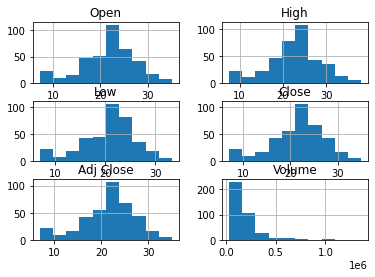

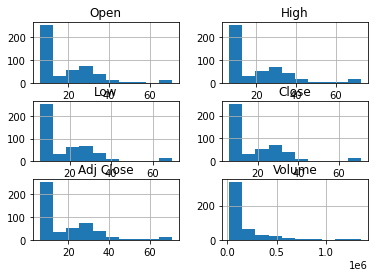

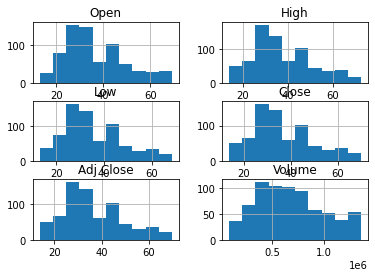

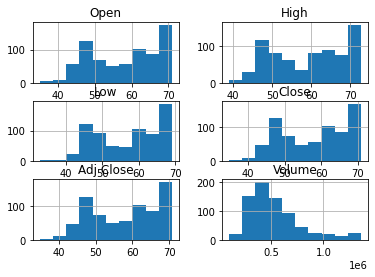

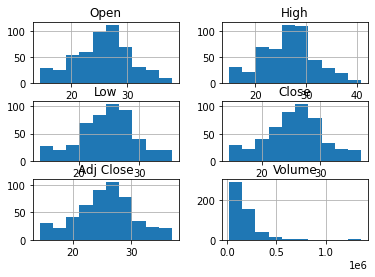

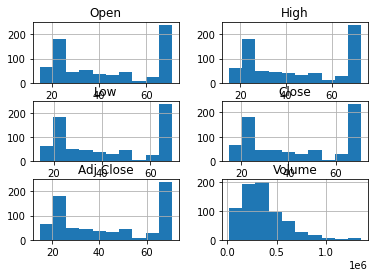

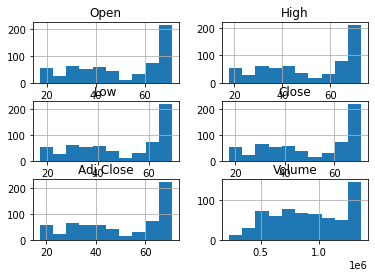

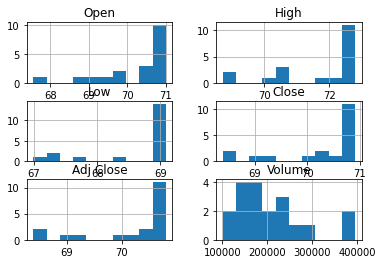

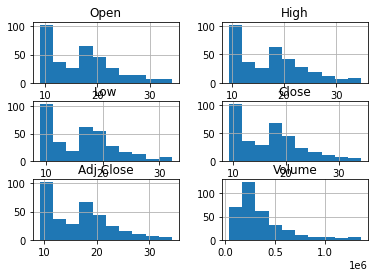

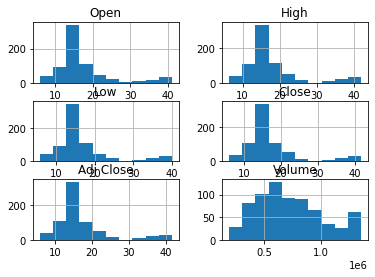

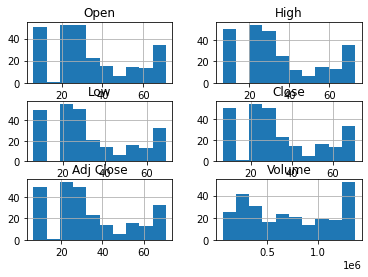

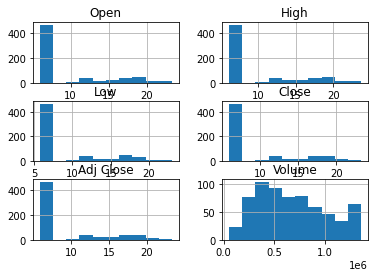

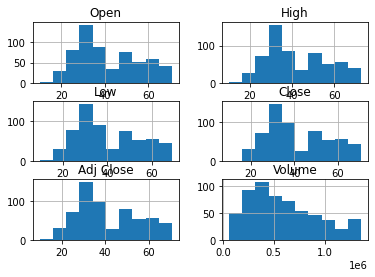

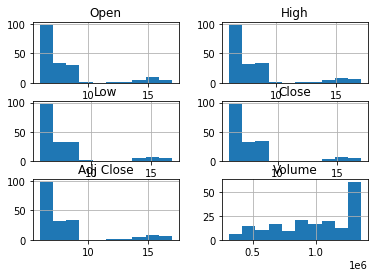

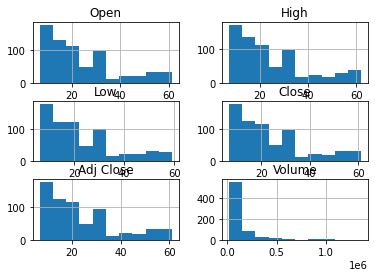

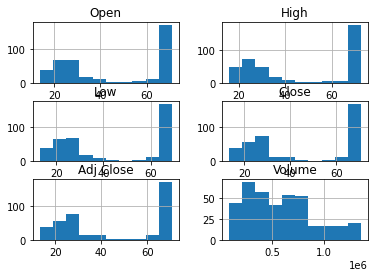

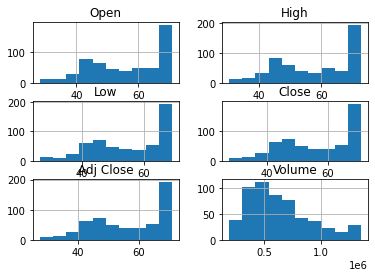

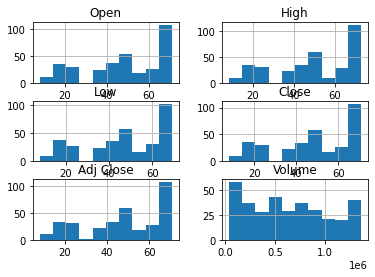

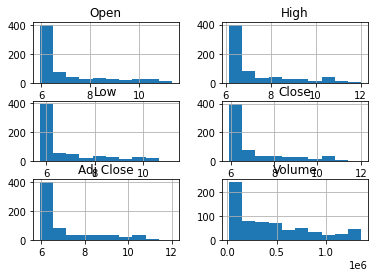

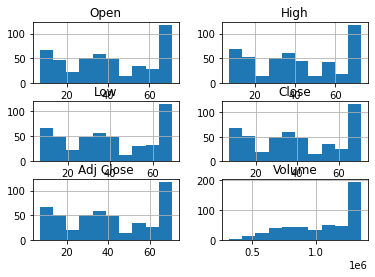

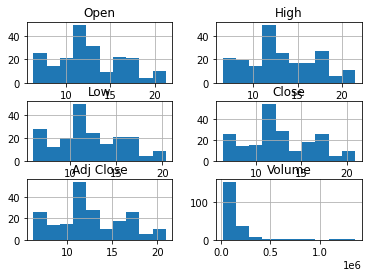

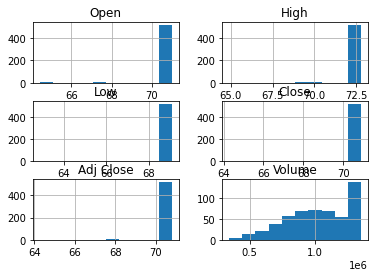

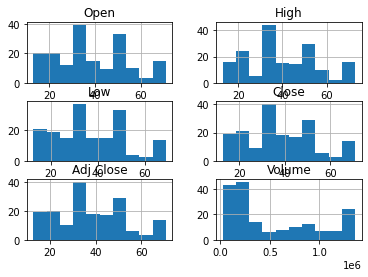

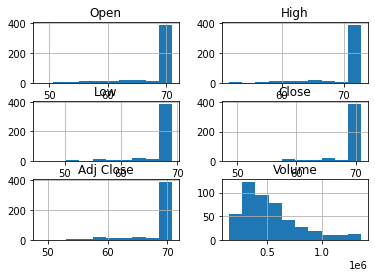

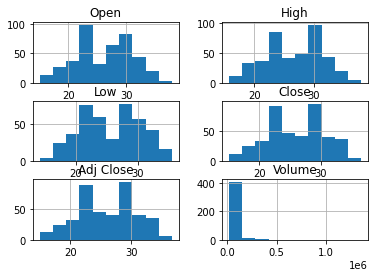

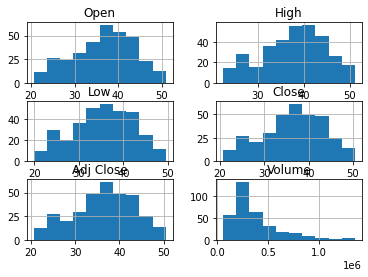

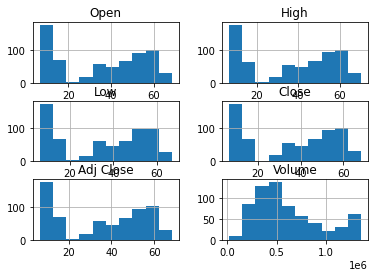

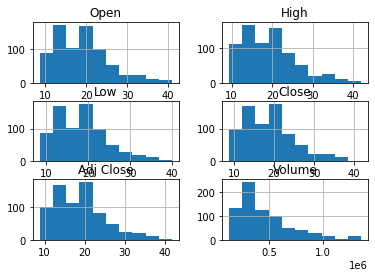

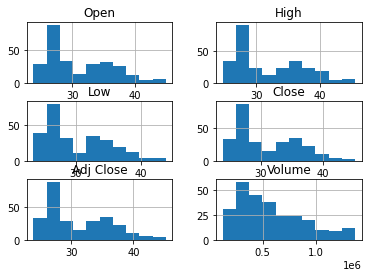

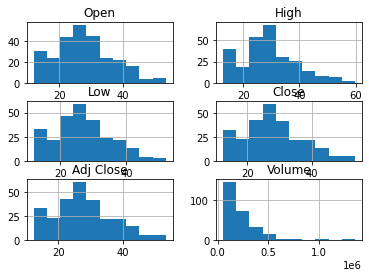

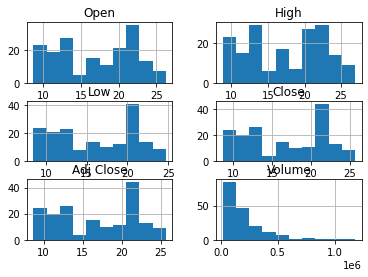

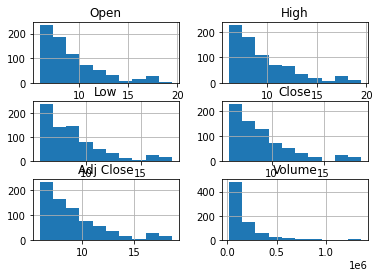

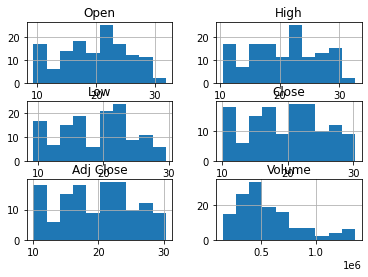

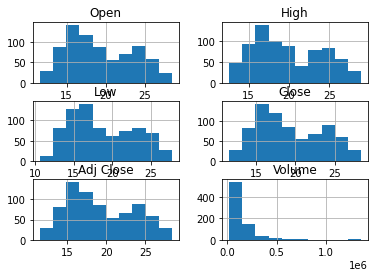

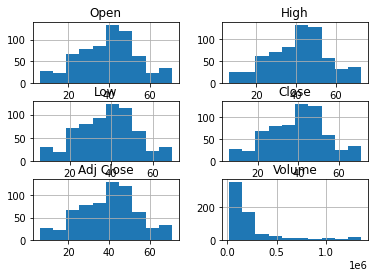

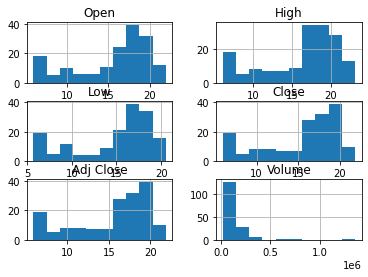

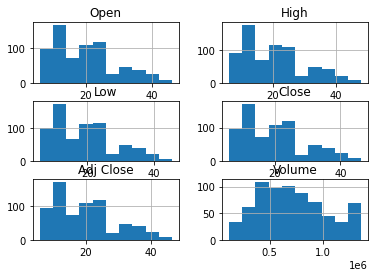

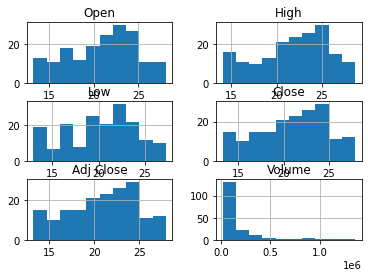

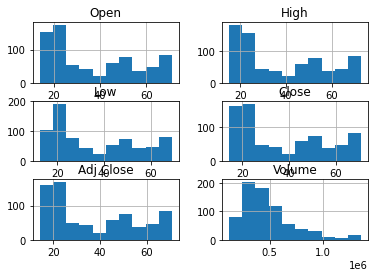

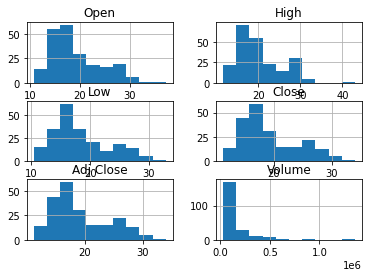

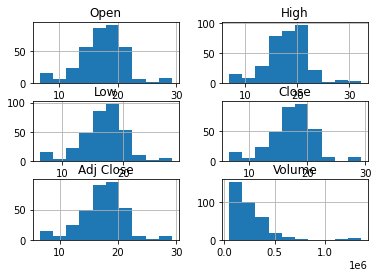

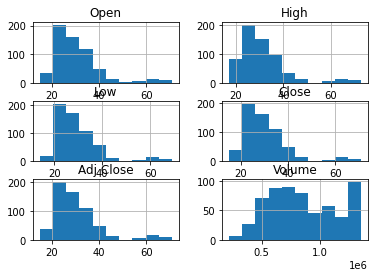

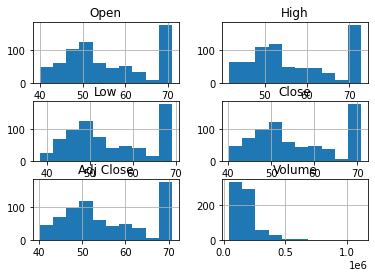

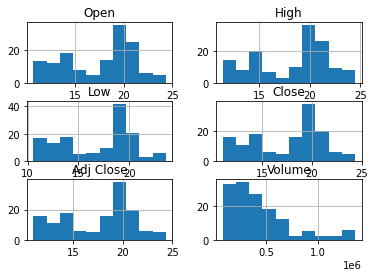

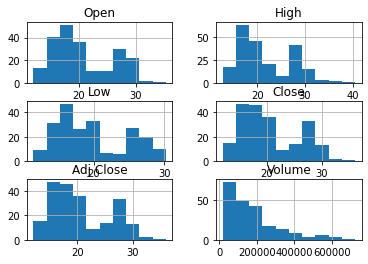

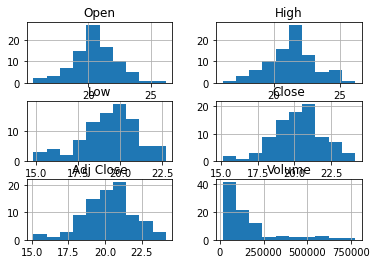

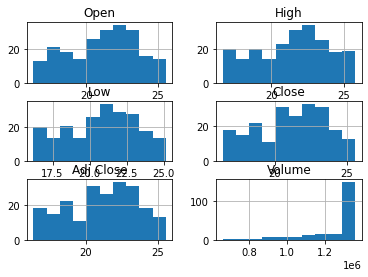

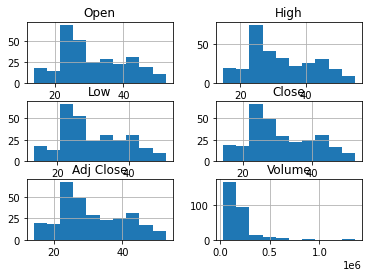

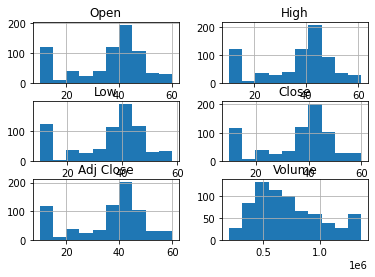

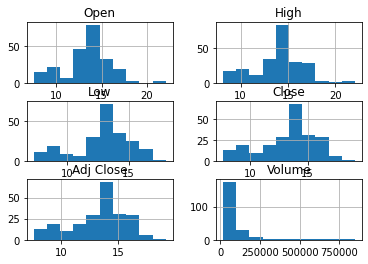

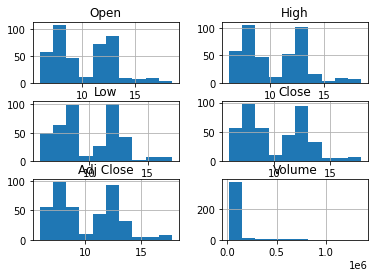

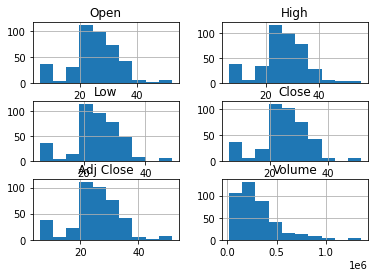

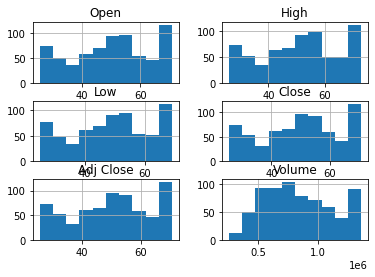

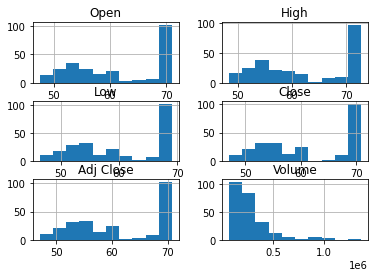

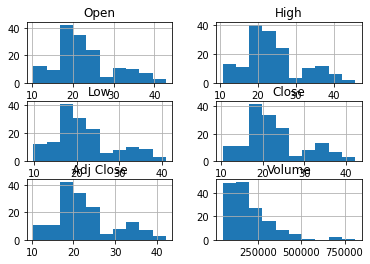

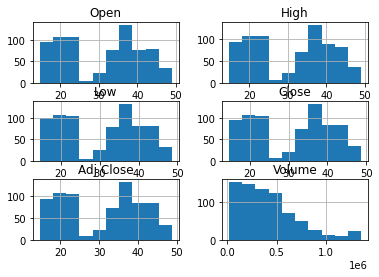

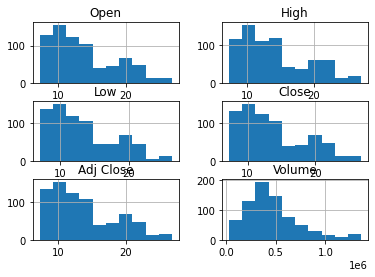

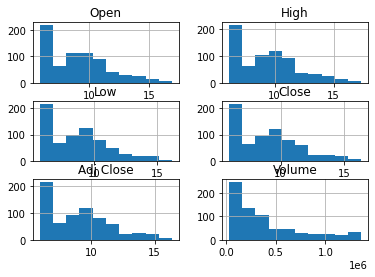

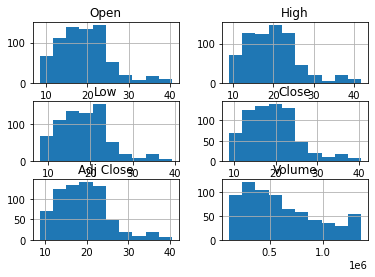

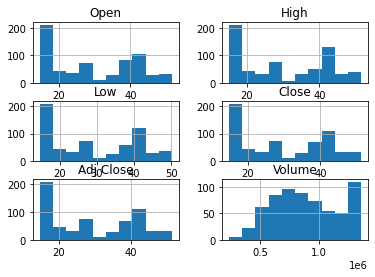

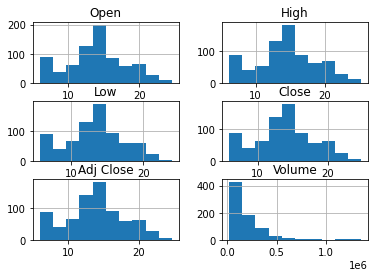

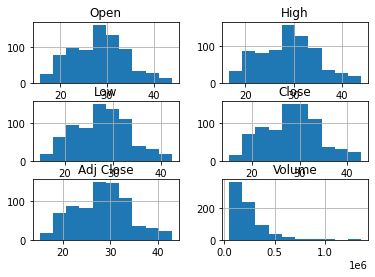

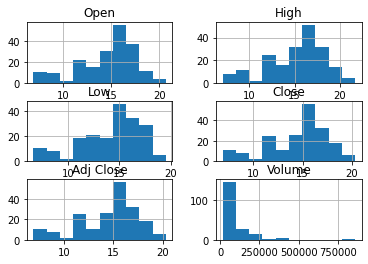

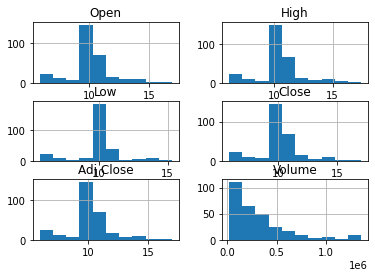

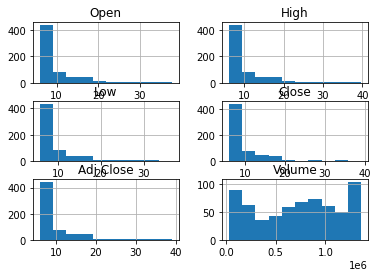

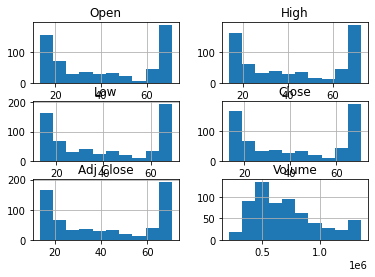

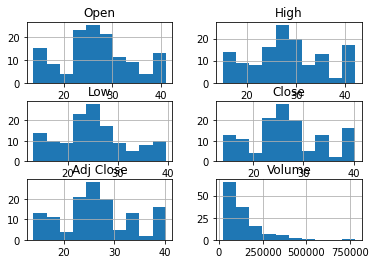

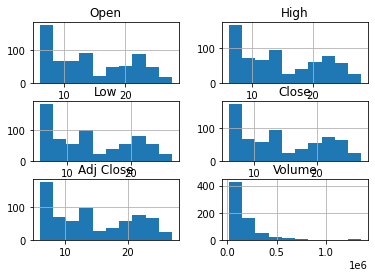

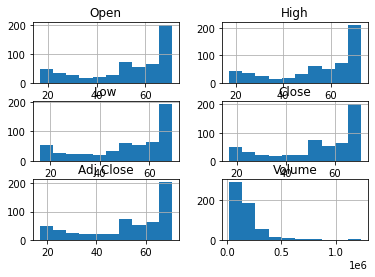

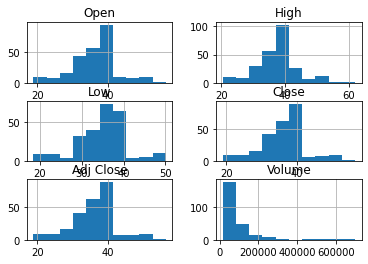

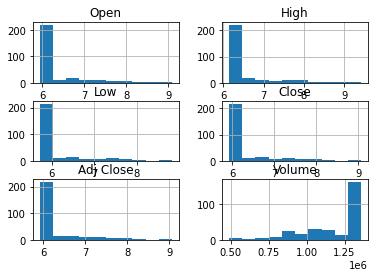

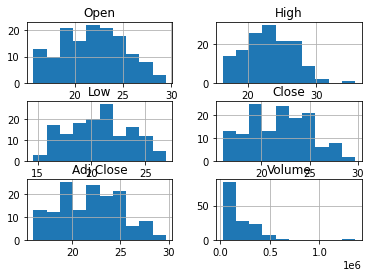

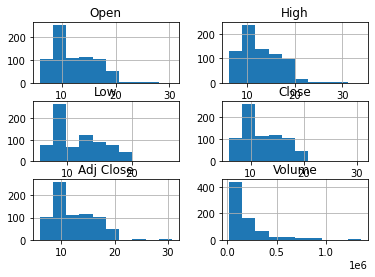

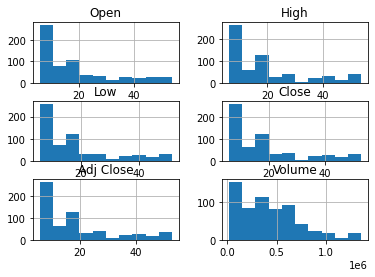

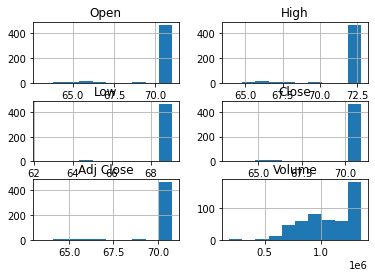

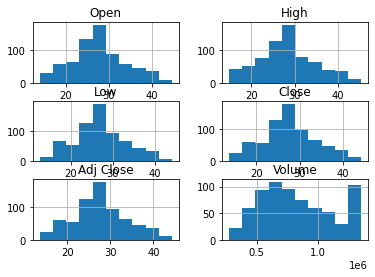

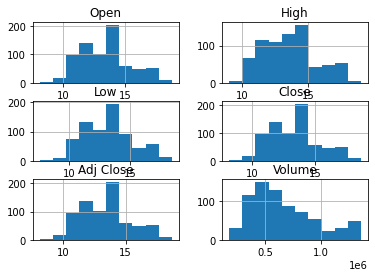

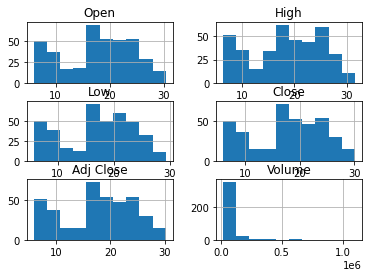

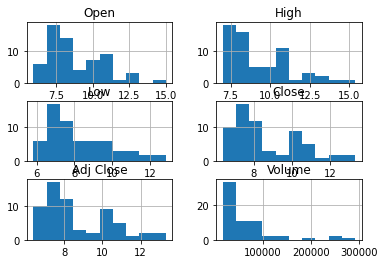

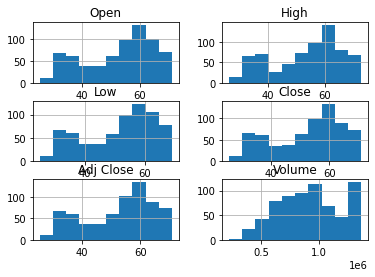

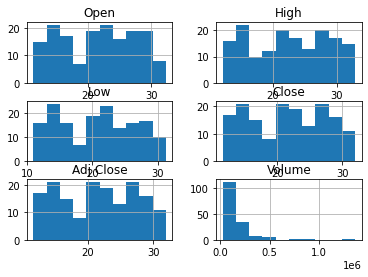

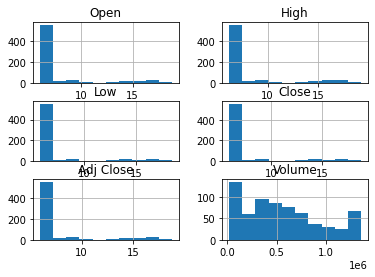

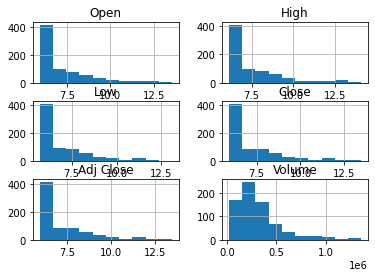

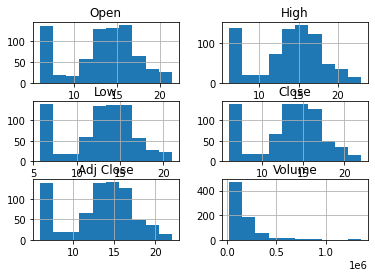

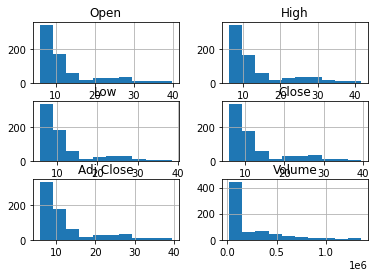

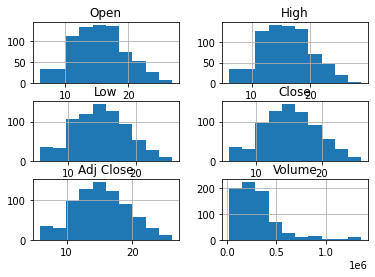

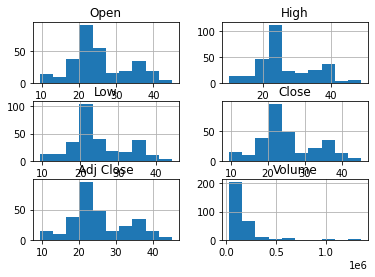

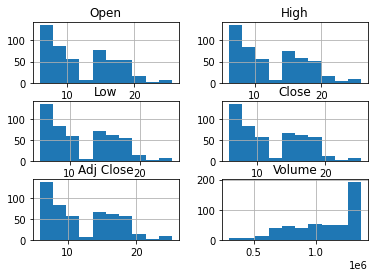

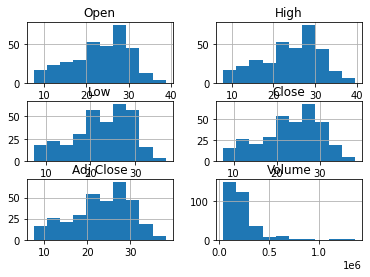

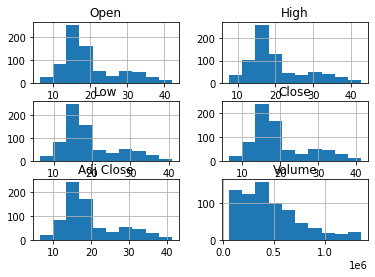

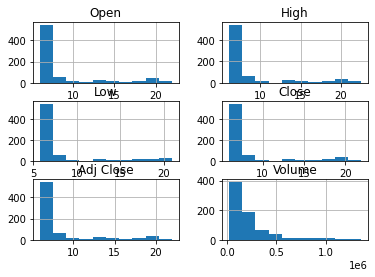

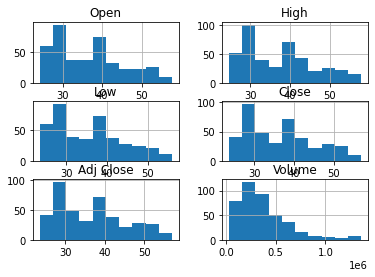

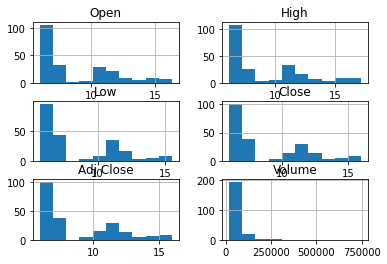

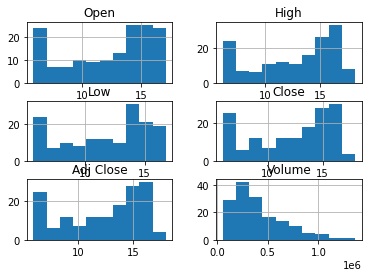

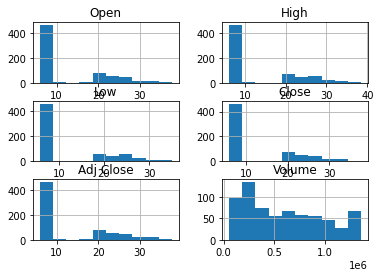

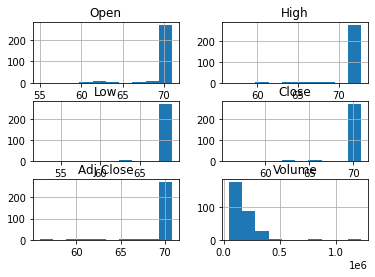

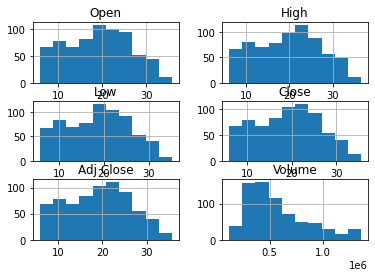

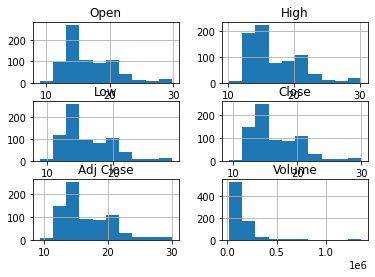

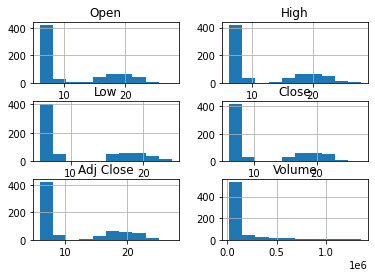

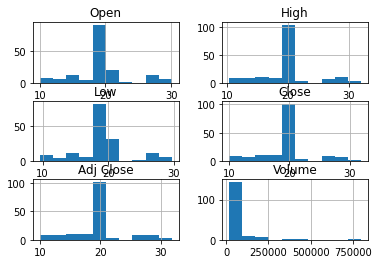

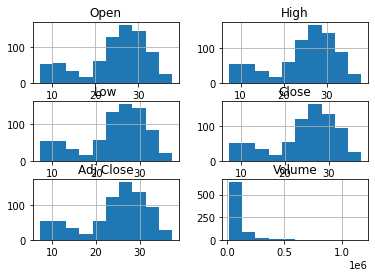

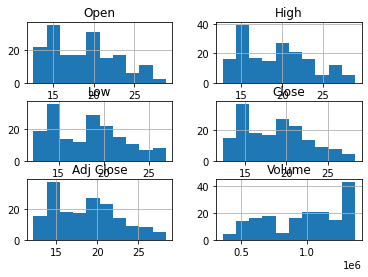

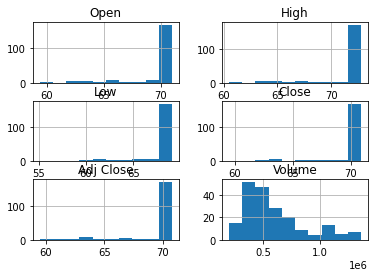

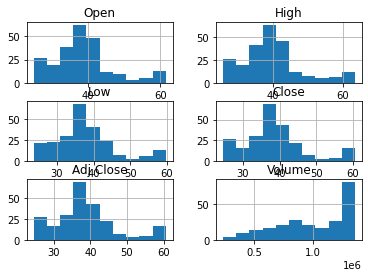

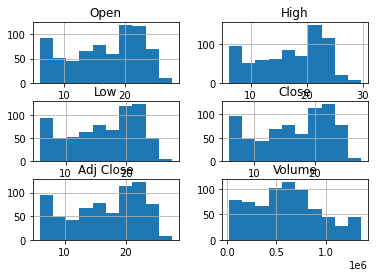

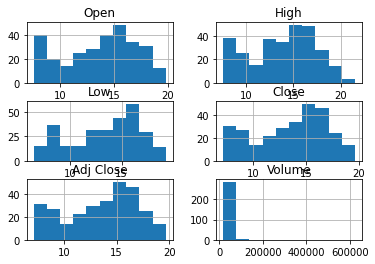

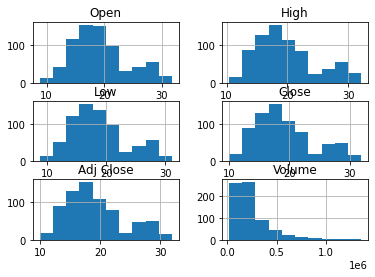

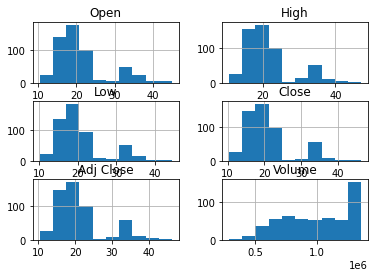

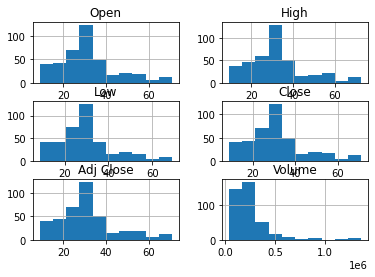

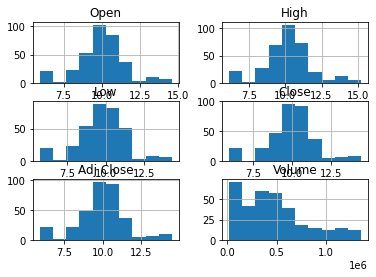

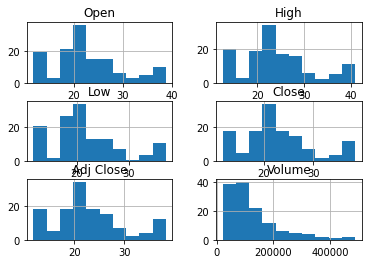

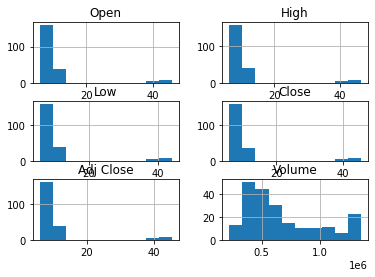

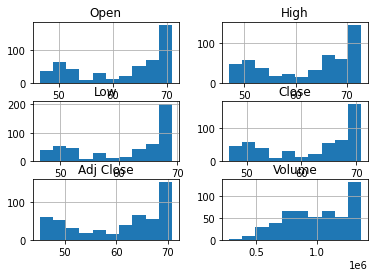

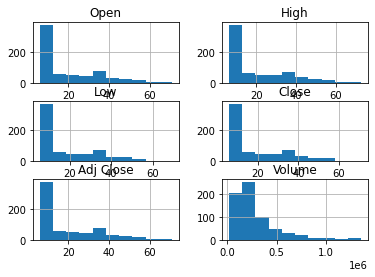

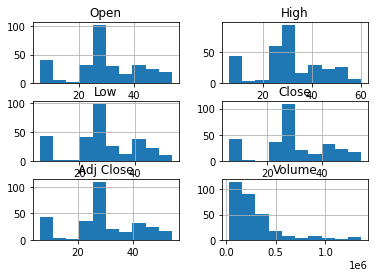

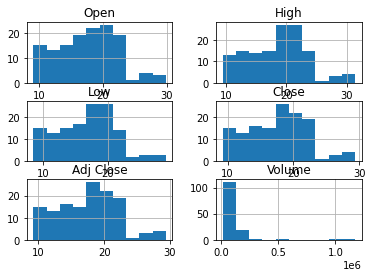

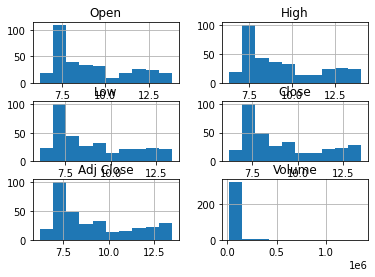

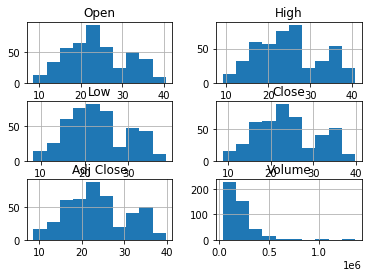

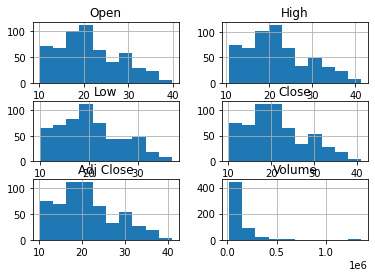

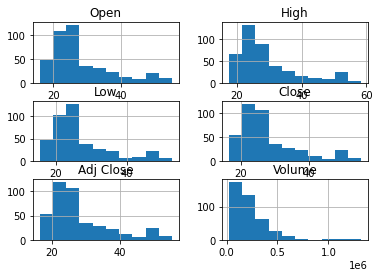

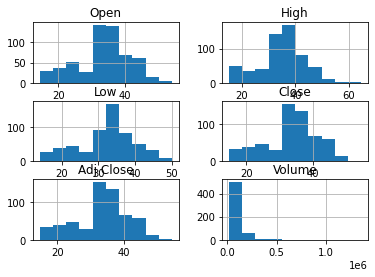

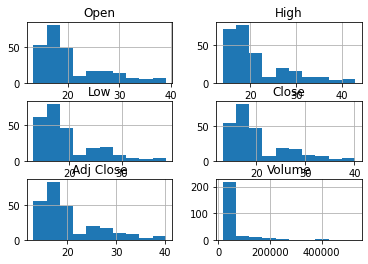

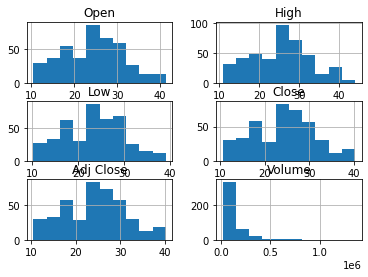

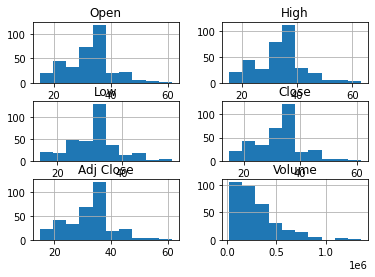

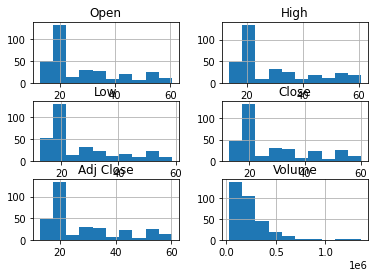

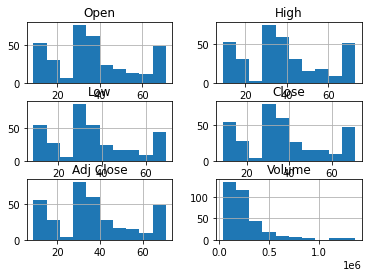

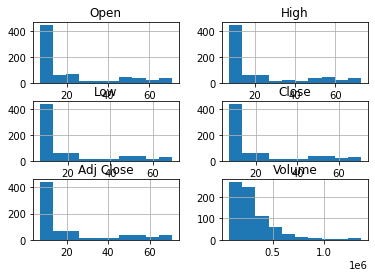

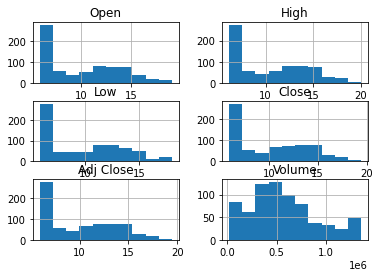

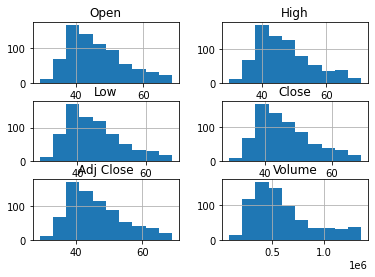

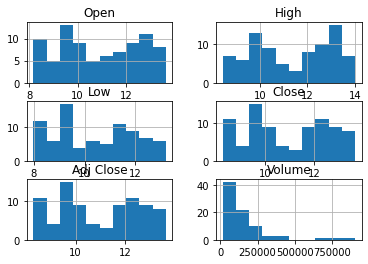

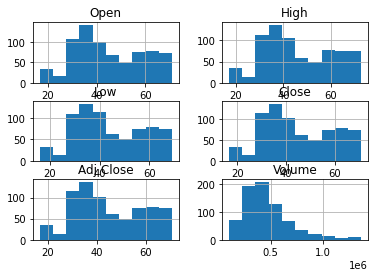

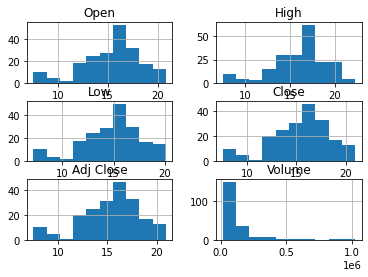

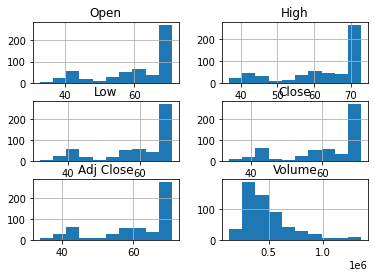

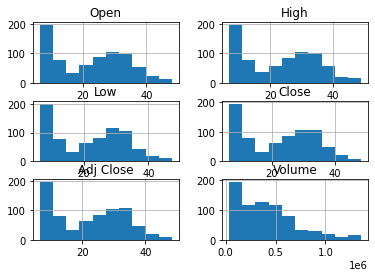

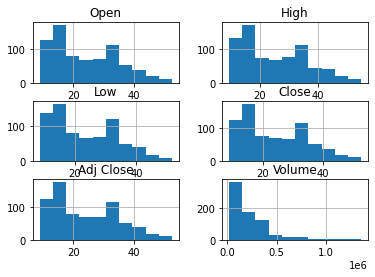

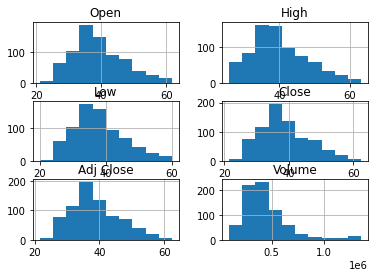

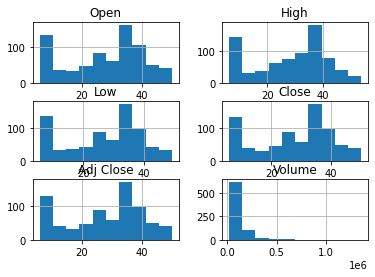

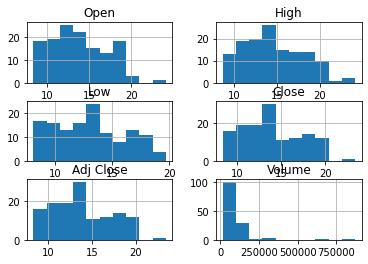

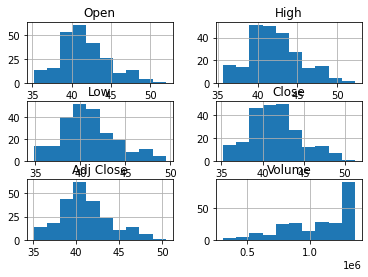

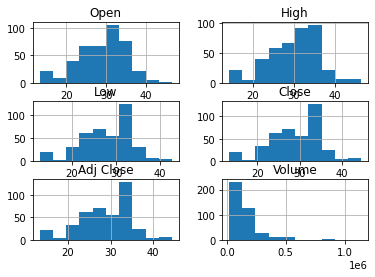

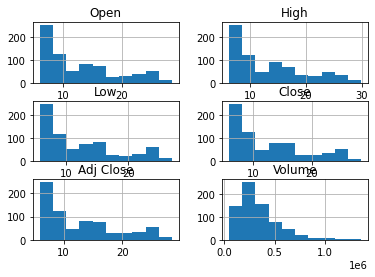

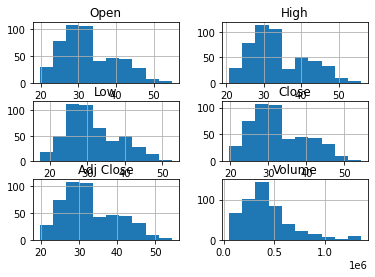

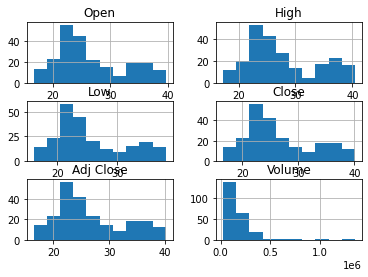

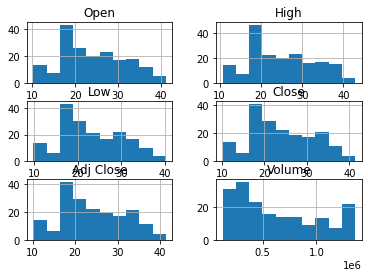

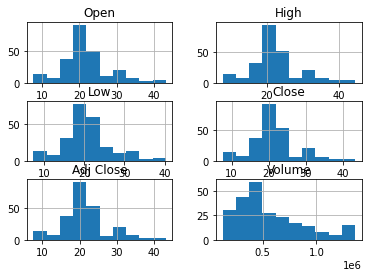

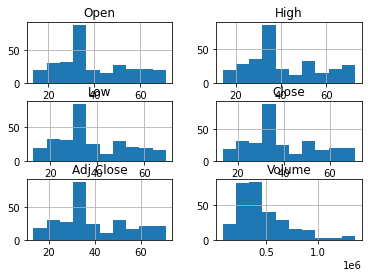

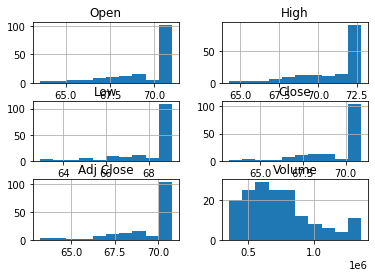

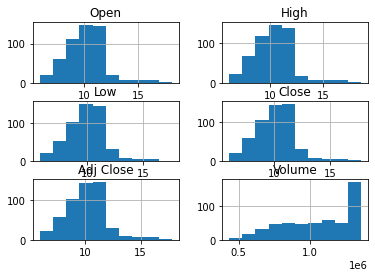

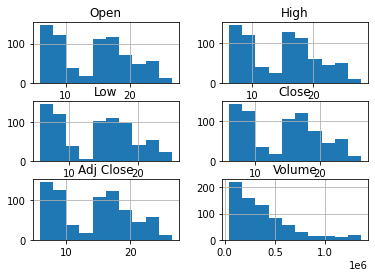

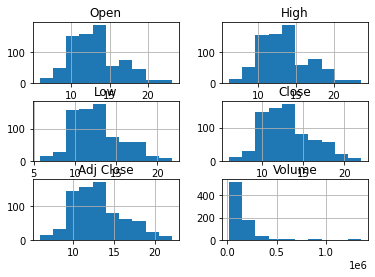

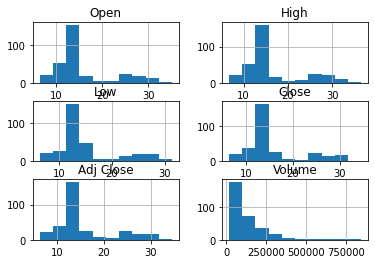

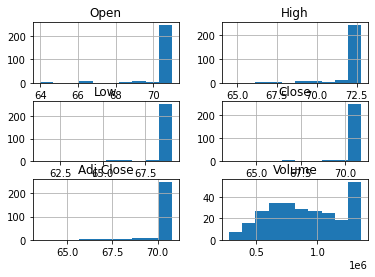

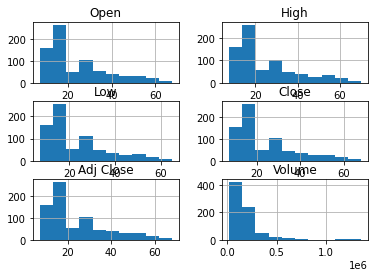

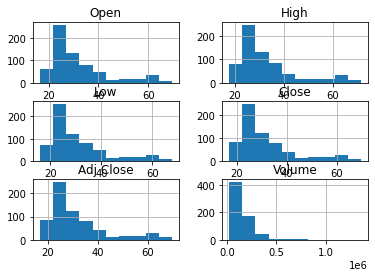

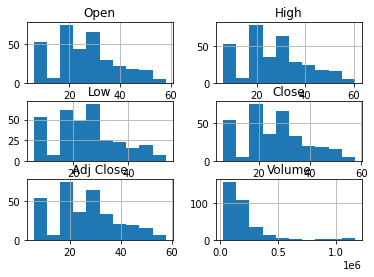

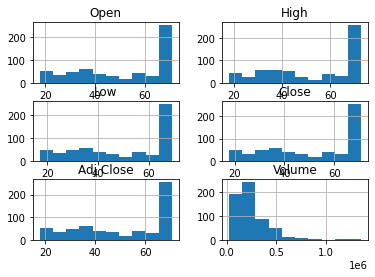

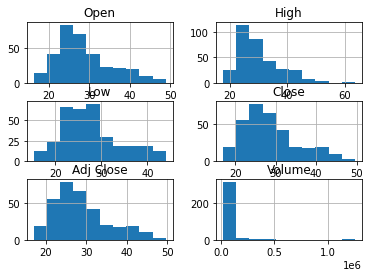

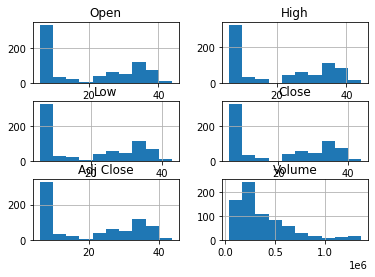

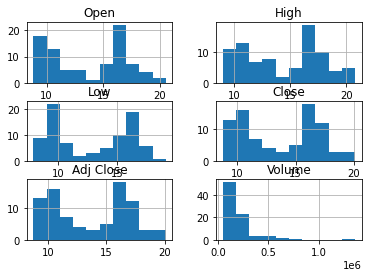

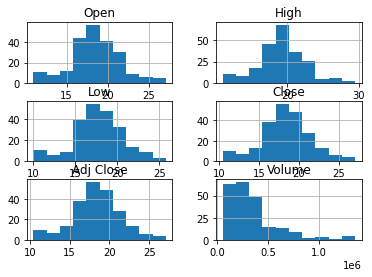

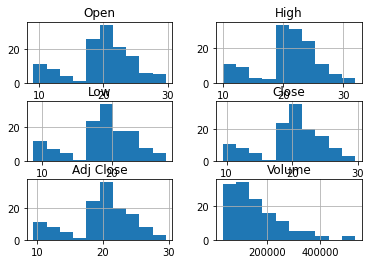

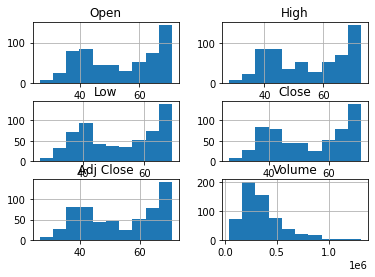

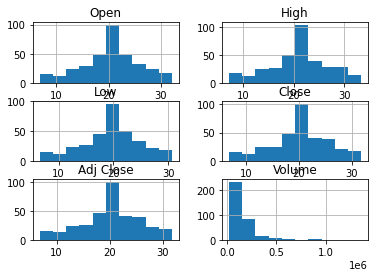

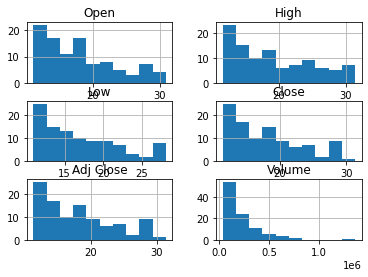

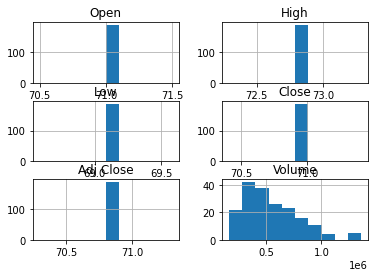

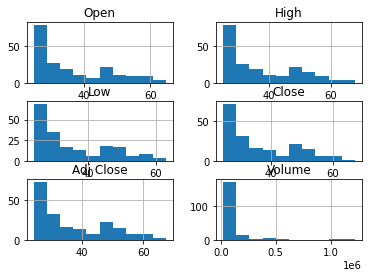

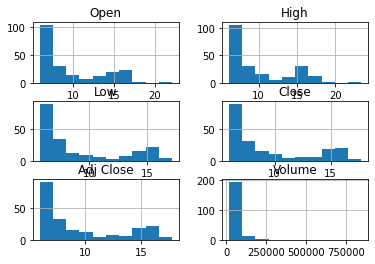

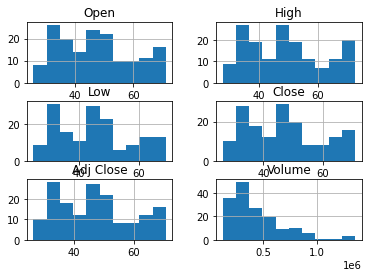

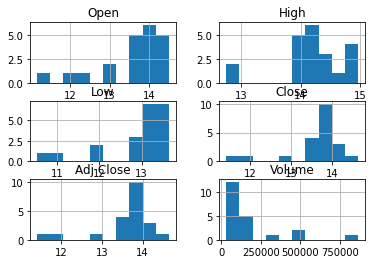

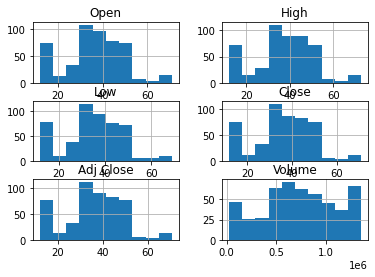

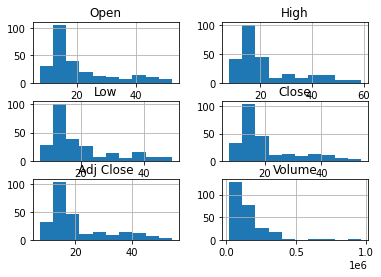

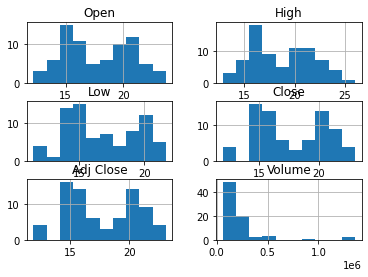

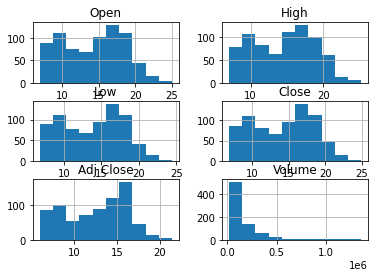

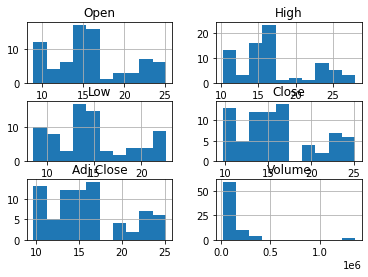

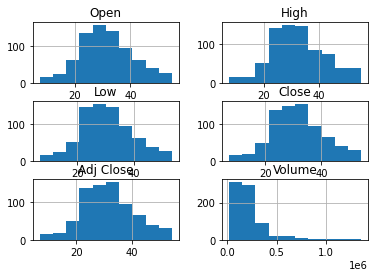

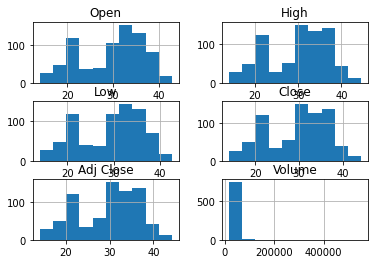

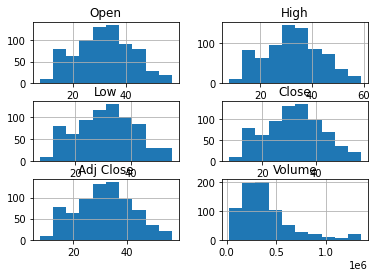

In [49]:
#looking at the hist for all symbol artibutes
new_data.groupby("Symbol").hist()
plt.show()



# Bivariate Analysis

analyzing data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.


a) Numerical-numerical analysis

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.


- Scatter Plot
- Pair Plot
- Correlation Matrix

# - Scatter plot

<Figure size 1080x360 with 0 Axes>

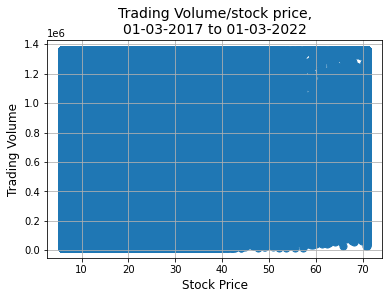

In [50]:
#scatter plot for looking at the relation btw close and volume
x=['Close']
y =['Volume']
plt.figure(figsize=[15,5])
new_data.plot.scatter(x, y, s=50);
plt.grid(True)
plt.title('Trading Volume/stock price,\n01-03-2017 to 01-03-2022', fontsize=14, color='black')
plt.xlabel("Stock Price",fontsize=12, color='black')
plt.ylabel("Trading Volume", fontsize=12, color='black') 
plt.show()


<AxesSubplot:xlabel='Close', ylabel='Volume'>

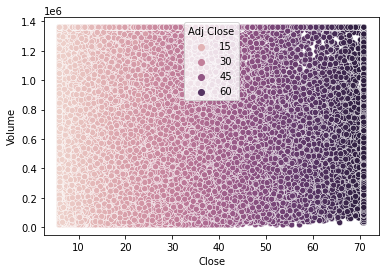

In [51]:
sns.scatterplot(x=new_data['Close'], y=new_data['Volume'], hue=new_data['Adj Close'])

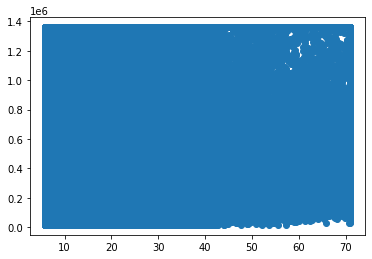

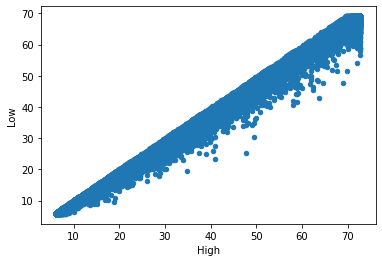

In [52]:
#plot the scatter plot of close and volume in data
plt.scatter(new_data.Close,new_data.Volume)
plt.show()

#plot the scatter plot of high and low variable in data
new_data.plot.scatter(x="High",y="Low")
plt.show()

# -Pairplot

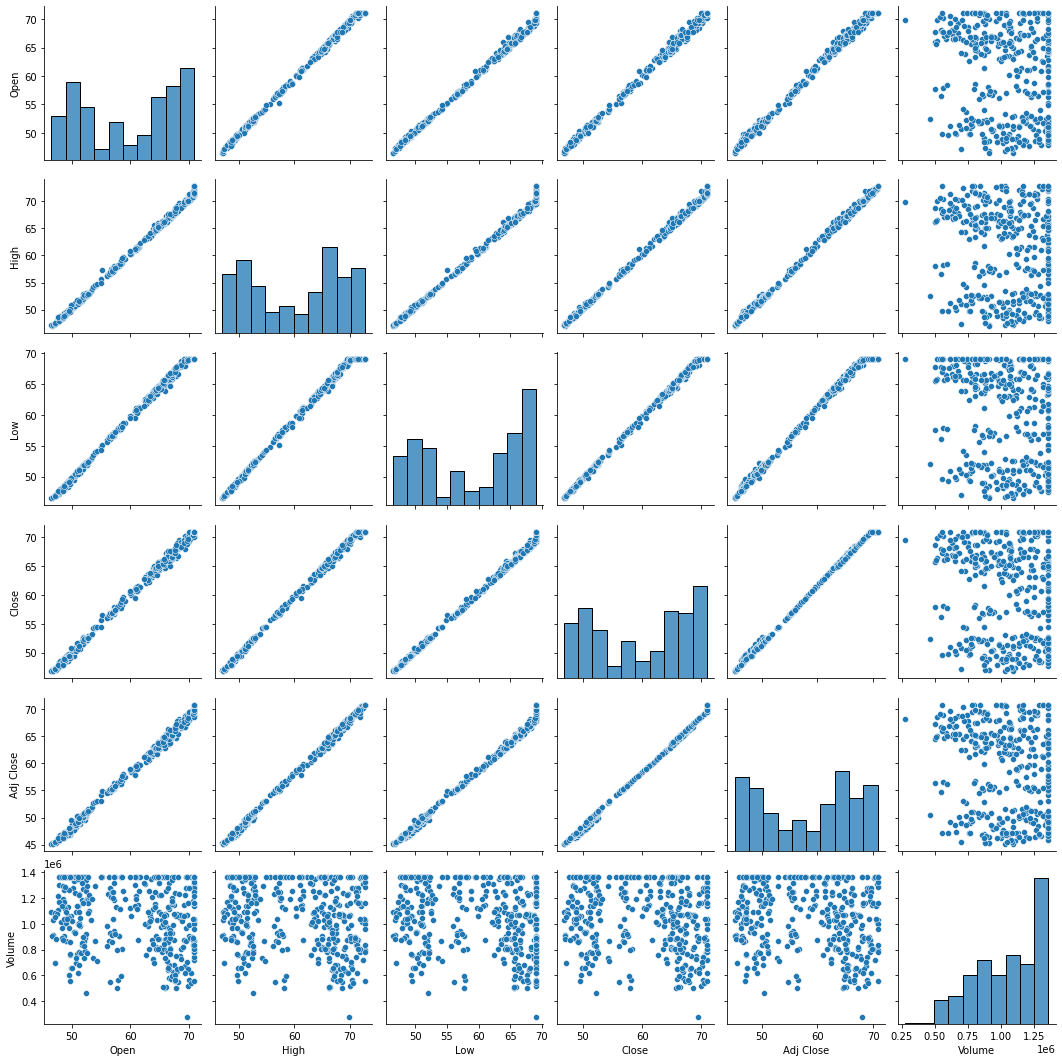

In [53]:
sns.pairplot(data=new_data.iloc[:400,:])

# - Correlation Matrix

In [54]:
corr_data=new_data.corr()

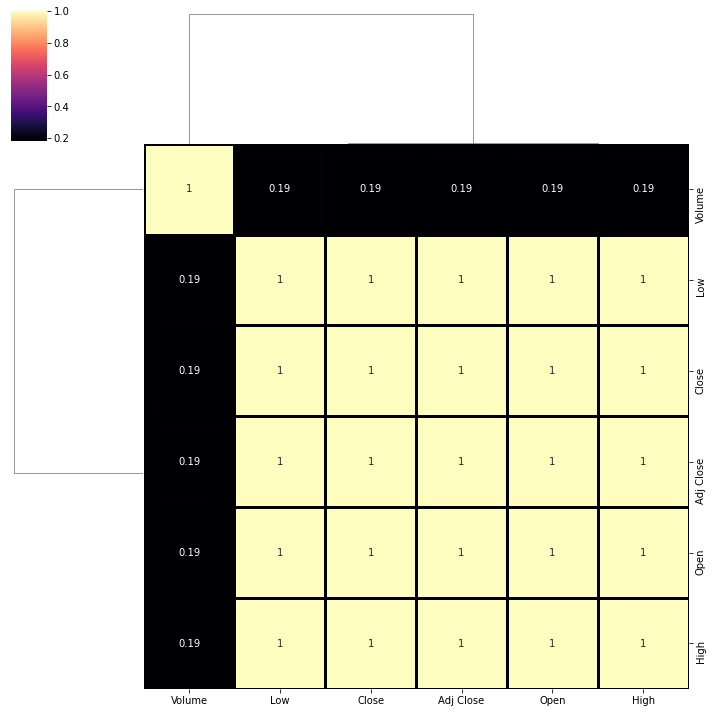

In [55]:
sns.clustermap(corr_data, cmap="magma", annot=True, linecolor="black", linewidth=3)

In [56]:
new_data.groupby('Symbol')['Close'].mean()

Symbol
ABCL    28.257056
ABCM    20.607077
ABOS    12.441307
ABSI    13.560522
ACAD    34.818632
          ...    
XBIT    14.164555
XLO     15.840400
YMAB    31.253214
ZEAL    29.631906
ZYME    31.748725
Name: Close, Length: 198, dtype: float64

In [57]:
new_data.groupby('Symbol')['Close'].median()

Symbol
ABCL    28.045000
ABCM    20.430000
ABOS    14.410000
ABSI    11.275000
ACAD    36.824999
          ...    
XBIT    14.685000
XLO     15.200000
YMAB    30.785001
ZEAL    31.230000
ZYME    31.990000
Name: Close, Length: 198, dtype: float64

# RAIN symbol is choosen randomly

In [58]:
from datetime import datetime

dates = ('2018-01-01', '2018-08-27', '2018-09-01', '2018-10-01')
format = '%Y-%m-%d'
start_dt = datetime.strptime('2018-08-01', format)
end_dt = datetime.strptime('2018-09-30', format)

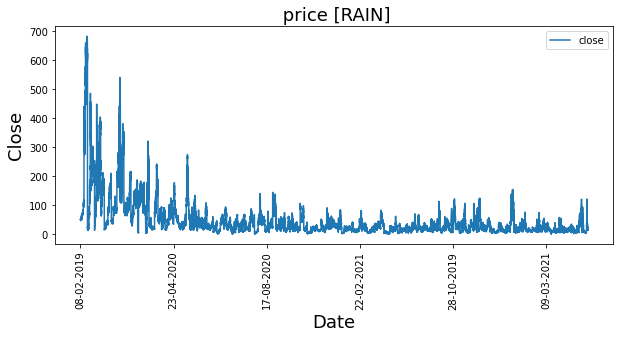

In [59]:

plt.figure(figsize=(25,10))
plt.title(' price [RAIN]', fontsize = 18)
data['Close'].plot(label= 'close',figsize=(10,4))
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Close', fontsize=18)

plt.legend()
plt.show()


# Moving average : for a randomly chosen symbol 

Moving averages are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following—or lagging—indicator because it is based on past prices. Shorter moving averages are typically used for short-term trading, while longer-term moving averages are more suited for long-term investors.

Predicting trends : Simple moving average 



In [60]:
#giving symbol name randomly and getting data (checking duplicate values)
randomsymbol = new_data[new_data.Symbol == "RAIN"]
randomsymbol.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
26-04-2021,15.350000,15.880000,14.305,15.400000,15.400000,651600.0,RAIN
27-04-2021,15.360000,15.940000,14.720,15.340000,15.340000,287500.0,RAIN
28-04-2021,16.200001,16.872999,15.620,16.200001,16.200001,374300.0,RAIN
29-04-2021,16.410000,16.700001,16.000,16.000000,16.000000,175900.0,RAIN
30-04-2021,16.100000,16.370001,15.520,16.370001,16.370001,128500.0,RAIN


In [61]:
#create a function to calculate SMA
def SMA(randomsymbol, period = 5,column = 'Close'):
    return randomsymbol[column].rolling(window=period).mean()

In [62]:
#create two column to store 5 SMA
randomsymbol['SMA5'] = SMA(randomsymbol,5)

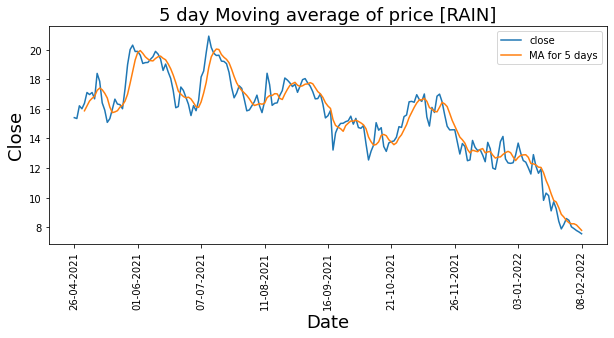

In [63]:
#visualizing SMA
plt.figure(figsize=(25,10))
plt.title('5 day Moving average of price [RAIN]', fontsize = 18)
randomsymbol['Close'].plot(label= 'close',figsize=(10,4))
randomsymbol['SMA5'].plot(label='MA for 5 days',figsize = (10,4)) 

plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Close', fontsize=18)

plt.legend()
plt.show()



In [64]:
randomsymbol.drop(['Symbol'], axis = 1)

,Open,High,Low,Close,Adj Close,Volume,SMA5
Date,,,,,,,
26-04-2021,15.350000,15.880000,14.305,15.400000,15.400000,651600.0,NaN
27-04-2021,15.360000,15.940000,14.720,15.340000,15.340000,287500.0,NaN
28-04-2021,16.200001,16.872999,15.620,16.200001,16.200001,374300.0,NaN
29-04-2021,16.410000,16.700001,16.000,16.000000,16.000000,175900.0,NaN
30-04-2021,16.100000,16.370001,15.520,16.370001,16.370001,128500.0,15.862
...,...,...,...,...,...,...,...
02-02-2022,8.490000,8.490000,7.750,8.020000,8.020000,330200.0,8.224
03-02-2022,7.800000,8.850000,7.800,7.900000,7.900000,93800.0,8.228
04-02-2022,7.850000,8.090000,7.550,7.770000,7.770000,40600.0,8.146


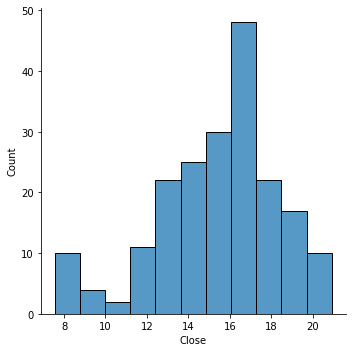

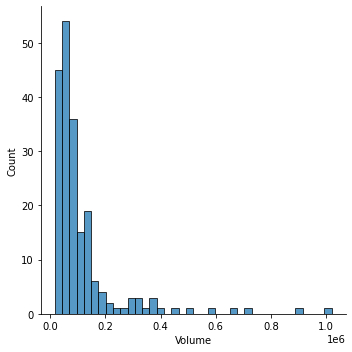

In [65]:
#checking data distribution and anomaly
#plot the histogram to see the distribution of the point data.
sns.displot(randomsymbol, x="Close")
sns.displot(randomsymbol, x="Volume")

# Analyzing returns  - for random symbol  

A return is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [66]:
#RAIN symbol
randomsymbol['Daily Return'] = randomsymbol['Close'].pct_change()

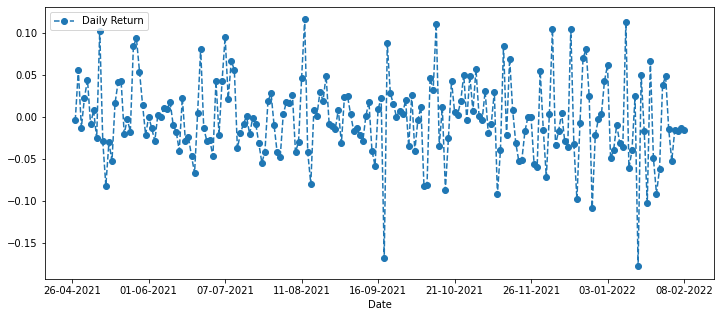

In [67]:
randomsymbol['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

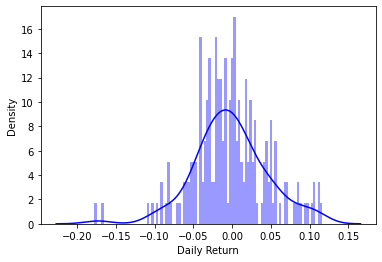

In [68]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(randomsymbol['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

In [69]:
returns = pd.DataFrame(randomsymbol['Close'])
returns  = returns.rename(columns={"Close": "RAIN_close"})


In [70]:
# Make a new tech returns DataFrame
tech_returns = returns.pct_change()

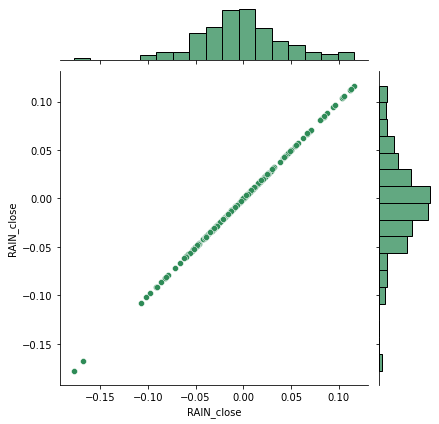

In [71]:
# Comparing RAIN to itself should show a perfectly linear relationship
sns.jointplot('RAIN_close','RAIN_close',tech_returns,kind='scatter',color='seagreen')
plt.show()

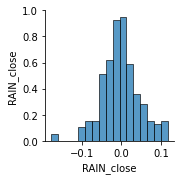

In [148]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())
plt.show()

In [74]:
returns = ( randomsymbol['Daily Return']+ 1).cumprod()

In [73]:
randomsymbol.head(3)

,Open,High,Low,Close,Adj Close,Volume,Symbol,SMA5,Daily Return
Date,,,,,,,,,
26-04-2021,15.350000,15.880000,14.305,15.400000,15.400000,651600.0,RAIN,NaN,NaN
27-04-2021,15.360000,15.940000,14.720,15.340000,15.340000,287500.0,RAIN,NaN,-0.003896
28-04-2021,16.200001,16.872999,15.620,16.200001,16.200001,374300.0,RAIN,NaN,0.056063


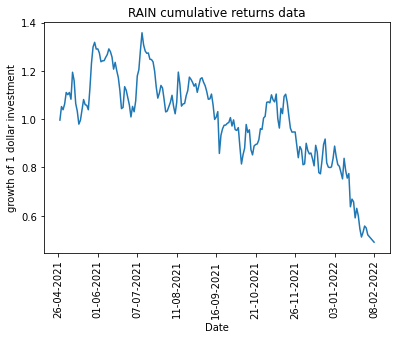

In [81]:
#calculating return for a growth of 1 dollar investment
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("growth of 1 dollar investment")
ax1.set_title("RAIN cumulative returns data")
plt.xticks(rotation=90)
plt.show()

You can see the returns are going negative, hence investing in this company might put you in risk 